In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import precision_recall_curve, auc, average_precision_score
from sklearn.tree import plot_tree
from numpy import sqrt
from numpy import argmax
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import ConfusionMatrixDisplay

<h1> Prediction and classification of the infrared temperature taken orally and from the forehead of patients during COVID-19

This report is concerned with the prediction and classification of two target variables: the average temperature of an individual taken from the mouth and the average temperature taken from the forehead. The dataset is taken from: https://archive.ics.uci.edu/dataset/925/infrared+thermography+temperature+dataset. This report includes multiple models for both the regression and classification tasks. 

## I. Data Import

In [300]:
# fetch dataset 
infrared_thermography_temperature = fetch_ucirepo(id=925) 
  
# data (as pandas dataframes) 
X = infrared_thermography_temperature.data.features 
y = infrared_thermography_temperature.data.targets 


## II. Methodology

<b> Feature engineering </b>


This report encountered some issues due to the raw data and its data types. Namely, the columns called "Gender", "Age" and "Ethnicity" had non-numerical data types that had to be engineered into int and floats.

The "Age" column had age brackets, i.e. "21-30", therefore each age bracket has been rendered to only one numerical value. The below numbers represent the transformation: '18-20':0, '21-30':1, '21-25':1, '26-30':2,  '31-40':3, '41-50':4, '51-60':5, '>60':6

The "Ethnicity" and "Gender" columns required one hot encoding, as each row contained its own type of ethnicity or gender that could not be transformed into a numerical value. This report used the get_dummies() function that converts categorical variables into dummy/indicator variables. The downside of one-hot encoding is that it can transform your dataframe to have too many variables, however since this report only uses roughly 1000 rows and 35 columns, it did not affect the number of new columns too much. 

Furthermore, as part of the feature engineering, the report looked for NaN values and dropped them and then created the classification targets based on the 37.5 degrees Celsius treshold. 

A necessary part of a classification problem is looking at imbalanced data. In this report, the data is severely imbalanced with the positive class being only 6.39%. Therefore, this report made us of the SMOTE technique (Synthetic Minority Oversampling Technique). According to (Brownlee, 2021), "SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line [...] This procedure can be used to create as many synthetic examples for the minority class as are required."

<b> Scaling </b> 

According to HOML (pg 72), one of the most important steps in a machine learning pipeline is scaling, because most algorithms will not perform well enough if the input data has multiple scales. The scaler "subtracts the mean value, and then it divides by the standard deviation so that the resulting distribution has unit variance" (p 72). Standardization does not bound the data to a specific range, however it is much less affected by outliers. The Standard scaler can be used after importing it from scikit-learn. 

Lastly, the data was split into training and test sets for both target variables, ready for both types of tasks: regression and classification. 

<b> Feature importance </b> 

This report uses multiple types of feature importance. Firstly, the linear regression introduces the coefficients that represent the relationshop between the independent features and the dependent features. The code uses rendered an array of coefficients for the most important features in the model. Generally speaking, a positive coefficient represents a positive relationship where the value of the independent feature is raised, so is the value of the dependent feature. 

Secondly, the random forests models showcase the feature with the highest impact on the decision making.

Thirdly, feature importances are provided by the fitted attribute feature_importances_ and they are computed as the mean and standard deviation of accumulation of the impurity decrease within each tree. (Scikit-learn, 2024)

<b> Regression task description </b> 

- Models used 

This report represents a comparison between multiple regresson models, such as linear regression, random forest, random forest grid search and Lasso. The aim is to be able to predict the two different variables, aveOralF and aveOralM, that represent the temperature taken both orally and from the forehead of a person. 

The first regressor model, a <b> linear regression </b>, "predicts the relationship between two variables by assuming a linear connection between the independent and dependent variables" (Mali, 2024). With a linear regression model, this report looked at the features and coefficients in order to understand the relationship between variables, but also to see the feature importance. Each coefficient value is associated with each of the features fed to the model and measures the connection it has to the target variable. 

The <b> polynomial regressor </b> is a linear model used for nonlinear data. According to HOML (p130), "a simple way to do this is to
add powers of each feature as new features, then train a linear model on this extended set of features". It uses scikit-learn's PolyNomialFeatures class that transforms data, adds the square of each feature as new features in the training set. Then it fits a simple linear regression through the new data. An advantage to the polynomial models is that if there are multiple features, they are capable of finding relationships between feautes, which is not possible for a linear regression. 

The <b> baseline random forest </b> model, is a group of decision trees gathered via the bagging method. This model introduces some randomness when the trees are growing, which feeds into a greater tree diversity. The most appealing thing about a random forest model is that it searches for the best feature that has the highest impact on a target variable (therefore using feature importance). According to HOML (p200), this is the process done via scikit-learn: "Scikit-Learn measures a feature’s importance by looking at how much the tree nodes that use that feature reduce impurity on average (across all trees in the forest). More precisely, it is a weighted average, where each node’s weight is equal to the number of training samples that are associated with i. Scikit-Learn computes this score automatically for each feature after training, then it scales the results so that the sum of all importances is equal to 1". The baseline random forest models use the base hyperparameters. 

A <b> grid search </b> is based on the random forest model that is used as a baseline and fine tuned with a grid search technique for a better output. Instead of running multiple models, wasting time and computing power on trying to identify the best combination of hyperparameters, it is advised one uses a grid search, using scikit-learn's GridSearchV. According to HOML (p79), "all you need to do is tell it which hyperparameters you want it to experiment with, and what values to try out, and it will evaluate all the possible combinations of hyperparameter values, using cross-validation. This report also looked at its best parameters for the grid search, in order to identify the best combination, as well as best estimators. 

The next regressor model in this report was the <b> Lasso regression </b>, which stems from the "least absolute shrinkage and selection operatore regression" (regularization term). It is a form of a regularized linear regression, where " it adds a regularization term to the cost function, but it uses the ℓ1 norm of the weight vector instead of half the square of the ℓ2 norm". (HOML, p139) The reason why this report used the Lasso regresion is due to an imbalance in data, but it also prevents overfitting by penalizing very large coefficients. It is also fairly easy to implement and interpret and it can deal with multicolinearlity where very correlated features affect the outcome. Therefore, the Lasso regressor distributes importance accross features.The Lasso model uses the L1 regularization technique. According to (Jain, 2024), "regularization is a technique used in machine learning to prevent overfitting and improve the generalization performance of a model. It involves adding a penalty term to the loss function during training." In L1, the weights could be reduce to zero since their absolute value can be penalized. 

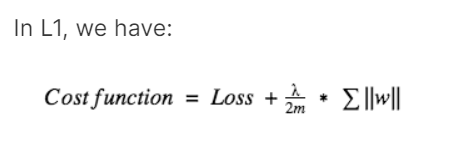

The final regressor is the <b> Ridge model </b>, that is a regularized version of the linear regression. It forces the algorithm to fit the data but keep the weights very small, according to HOML (p137). What separates Ridge from other linear regression is that it shrinks parameters, to prevent multicollinearity and reduces the model complexity. It uses the L2 regularization technique as well. The L2 regulariation technique uses the below cost function, where labda is a regularization parameter. It forces the weights to decay towards zero. 



![image.png](attachment:062aab05-327a-4105-9ef7-30c06febea76.png)


- Performance measures

According to "Hands on Machine Learning", the most common performance measure is the<b>  Root Mean Square Error </b> (or RMSE), because it measures how much erorr there is in predictions. The mathematical formula to compute it is: 

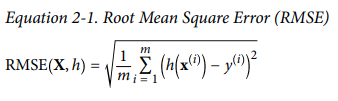

Secondly, I chose to apply the <b> Mean Squared Error (MSE) </b>, which is the "average squared distance between the observed and predicted values", according to (Frost, 2023). 

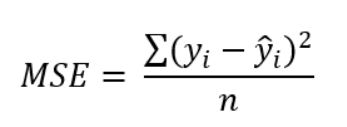

Thirdly, the <b> R squared </b> performance measure quantifies how well the features explain the variance in the model. (Agrawal, 2023)

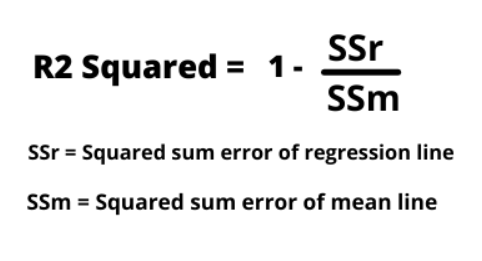

<b> Classification task </b> 

- Models used 

The classifier models used in this report are SGD, random forest, random forest grid search and XGBoost. The binary classification is concerned with identifying individuals with a temperature of over 37.5 degrees Celsius, which is the treshold used in the code. 

The first classifier model used in this report was the <b> SGD classifier </b>, also known as the Stochastic Gradient Descent. According to Homl (p126), the SGD classifier "picks a random instance in the training set at every step and computes the gradients based only on that single instance", which makes it easier to compute and consumes less time. It also allows the model to compute a big input of data, as opposed to other models. 

The second and third classifiers chosen are the <b> simple random forest and the random forest grid search </b> that use the same information as above. 

Finally, the <b> XGBoost classifier </b> or Extreme Gradient Boosting, is an optimized implementation of the Gradient boosting algorithm. The benefits of XGBoost, according to HOML (p208), are that it is "extremely fast, scalable and portable. In fact, XGBoost is often an important component of the winning entries in ML competitions". It also incorporates an automatic early stoppping of the model once it identified the best epoch. In shorter terms, XGBoost is "an implementation of gradient boosted decision trees designed for speed and performance". (Brownlee, 2021) Additionally, some of the key feature includes sparse aware implementation, block structure and continued trining. XGBoost provides both execution speed and model performance. 

The XGBoost classifier in this report also uses a grid search to identify the best combination of hyperparameters. 

- Performance Measures

The <b> accuracy </b> is one of the performance measures most used for classification and it renders the ratio of correct predictions, according to "Hands on machine learning". However, the accuracy can be quite difficult to interpret when it comes to outliers or overfitting and therefore it is not the most flexible way of measuring the performance of a model. 

Another one of the performance measures this report uses for the classification tasks is the <b> confusion matrix </b>, which "count the number of times instances of class A are classified as class B" (HOML). In a confusion matrix, "each row in a confusion matrix represents an actual class, while each column represents a predicted class" (HOML). Example of a confusion matrix can be found below (pg 93): 

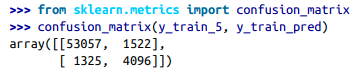

Thirdly, the <b> precision/recall </b> used in this report represents another performance measured (a combination of two different ways to measure classifiers). According to HOML, "a trivial way to have perfect precision is to make one single positive prediction and ensure it is correct (precision = 1/1 = 100%). This would not be very useful since the classifier would ignore all but one positive instance. So precision is typically used along with another metric named recal" (pg 93). Precision/recall can be imported from scikit-learn 

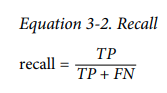

Finally, the <b> F1 score  </b> is calculated after the precision/recall are done. According to HOML (p 94), the F1 score is "harmonic mean of precision and recall". 

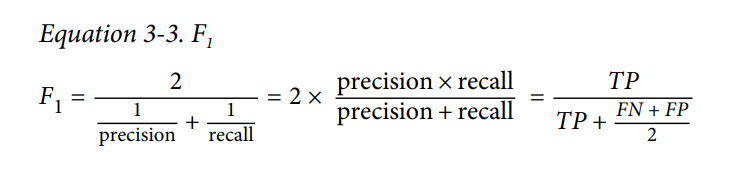

This report also incorporates a precision/ recall plot and the ROC curve ((receiver operating characteristic) for all classifier models. The ROC curve plots the true postive rate against the false positive rate. It can be used after being import from scikit-learn. 


### Limitations 

As with any analysis done on freely available data, there are limitations with this report. The biggest limitation was the lack of data for running complicated models. The raw data has just roughly 1000 rows, which is not nearly enough to cover three training sets: train, test, validation. As such, some of the models are clearly overfitting (according to the ROC curves, precision/recall plots and the performance measures). Initially, this report was conduced with only train and test data, and all models, both regresssors and classifiers performed well, with performance measures in between 0 and 1. However, as this report follows industry standards, it split the data into the three training sets, which lead to the very low performance of some of the models. This resulted in a difficult analysis and was an obstacle in finding the best model, as well rendering well plotted precision/recall plots. Neural networks were also considered, however the lack of data made it impossible to implement. 

--------------------------------------------

## III. EDA

In [301]:
df = X.merge(y, left_index=True, right_index=True)

In [302]:
df.head(5)

,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,...,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralF,aveOralM
0,Male,41-50,White,24.0,28.0,0.8,0.7025,35.0300,35.3775,34.4000,...,33.3725,33.4925,33.0025,34.5300,34.0075,35.6925,35.6350,35.6525,36.85,36.59
1,Female,31-40,Black or African-American,24.0,26.0,0.8,0.7800,34.5500,34.5200,33.9300,...,33.6775,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075,37.00,37.19
2,Female,21-30,White,24.0,26.0,0.8,0.8625,35.6525,35.5175,34.2775,...,34.6475,34.8200,34.6700,35.3450,35.2225,35.9125,35.8600,35.8850,37.20,37.34
3,Female,21-30,Black or African-American,24.0,27.0,0.8,0.9300,35.2225,35.6125,34.3850,...,34.6550,34.3025,34.9175,35.6025,35.3150,35.7200,34.9650,34.9825,36.85,37.09
4,Male,18-20,White,24.0,27.0,0.8,0.8950,35.5450,35.6650,34.9100,...,34.3975,34.6700,33.8275,35.4175,35.3725,35.8950,35.5875,35.6175,36.80,37.04


In [303]:
df.shape

(1020, 35)

In [304]:
df.columns

Index(['Gender', 'Age', 'Ethnicity', 'T_atm', 'Humidity', 'Distance',
       'T_offset1', 'Max1R13_1', 'Max1L13_1', 'aveAllR13_1', 'aveAllL13_1',
       'T_RC1', 'T_RC_Dry1', 'T_RC_Wet1', 'T_RC_Max1', 'T_LC1', 'T_LC_Dry1',
       'T_LC_Wet1', 'T_LC_Max1', 'RCC1', 'LCC1', 'canthiMax1', 'canthi4Max1',
       'T_FHCC1', 'T_FHRC1', 'T_FHLC1', 'T_FHBC1', 'T_FHTC1', 'T_FH_Max1',
       'T_FHC_Max1', 'T_Max1', 'T_OR1', 'T_OR_Max1', 'aveOralF', 'aveOralM'],
      dtype='object')

### Data Processing

In [305]:
df = pd.get_dummies(df, columns=['Gender', 'Ethnicity'], drop_first=True)

In [306]:
df['Age'].value_counts()

18-20    534
21-25    355
26-30     67
31-40     31
51-60     11
21-30     10
41-50      9
>60        3
Name: Age, dtype: int64

In [307]:
df['Age'] = df['Age'].replace({'18-20':0, '21-30':1, '21-25':1, '26-30':2,  '31-40':3, '41-50':4, '51-60':5, '>60':6})

In [308]:
df.isna().sum()

Age                                    0
T_atm                                  0
Humidity                               0
Distance                               2
T_offset1                              0
Max1R13_1                              0
Max1L13_1                              0
aveAllR13_1                            0
aveAllL13_1                            0
T_RC1                                  0
T_RC_Dry1                              0
T_RC_Wet1                              0
T_RC_Max1                              0
T_LC1                                  0
T_LC_Dry1                              0
T_LC_Wet1                              0
T_LC_Max1                              0
RCC1                                   0
LCC1                                   0
canthiMax1                             0
canthi4Max1                            0
T_FHCC1                                0
T_FHRC1                                0
T_FHLC1                                0
T_FHBC1         

In [309]:
df = df.dropna()

In [310]:
df.dtypes

Age                                      int64
T_atm                                  float64
Humidity                               float64
Distance                               float64
T_offset1                              float64
Max1R13_1                              float64
Max1L13_1                              float64
aveAllR13_1                            float64
aveAllL13_1                            float64
T_RC1                                  float64
T_RC_Dry1                              float64
T_RC_Wet1                              float64
T_RC_Max1                              float64
T_LC1                                  float64
T_LC_Dry1                              float64
T_LC_Wet1                              float64
T_LC_Max1                              float64
RCC1                                   float64
LCC1                                   float64
canthiMax1                             float64
canthi4Max1                            float64
T_FHCC1      

### Visualisations

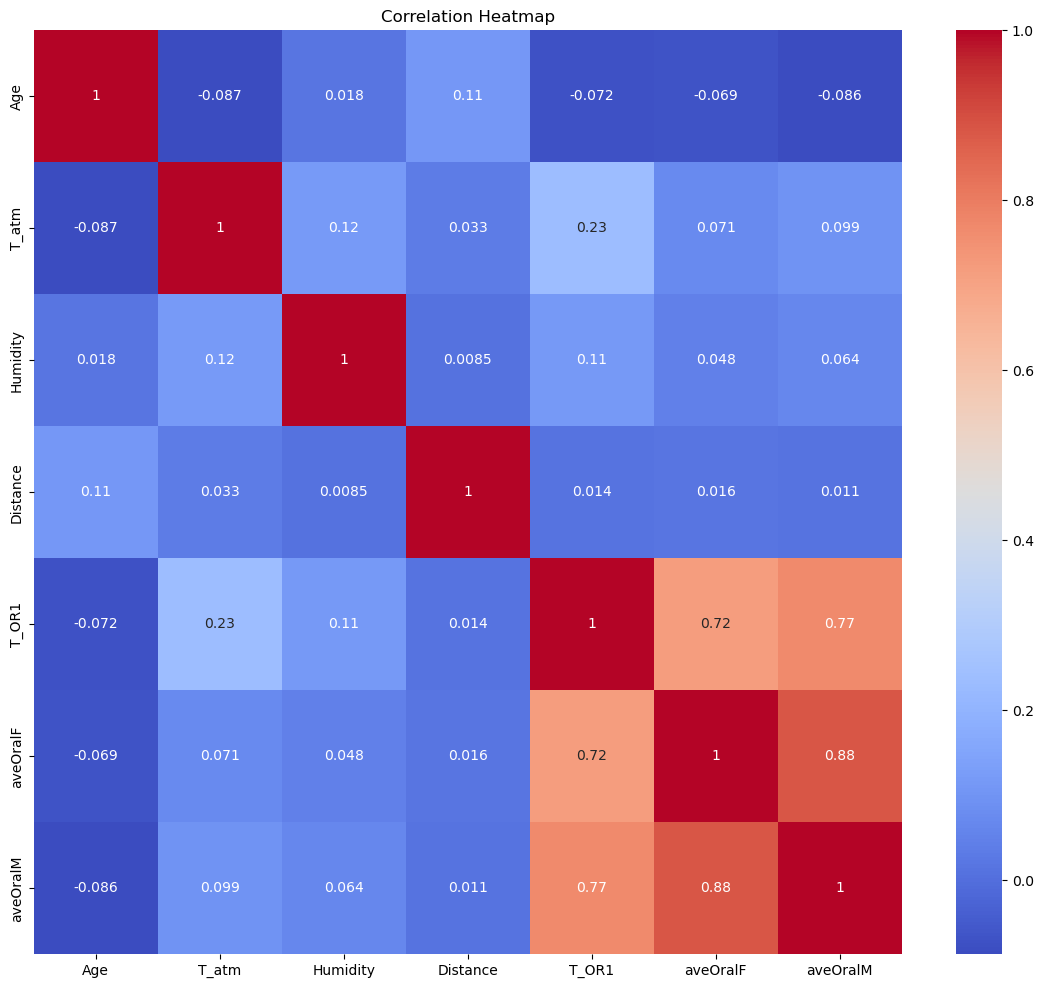

In [311]:
plt.figure(figsize=(14, 12))
corr = df[['Age', 'T_atm', 'Humidity', 'Distance', 'T_OR1', 'aveOralF', 'aveOralM']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

The heatmap above highlights the correlations between multiple variables in the given dataset. In particularly, it shows a very strong correlation between age and the average oral temperature taken from the mouth, with a second strong correlation between age and the average oral temperature taken from the forehead. 

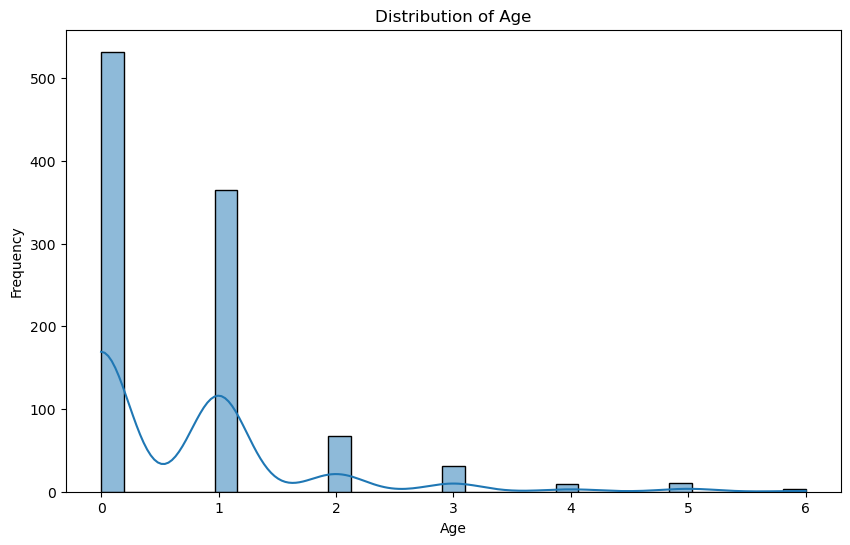

In [312]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

As mentioned in the methodology, the age groups have been split into numbers from 0 to (from youngest to oldest), therefore this graph illustrates that the majority of the patients in the data are in groups 0 and 1, respectively between 18 and 30 years old. 

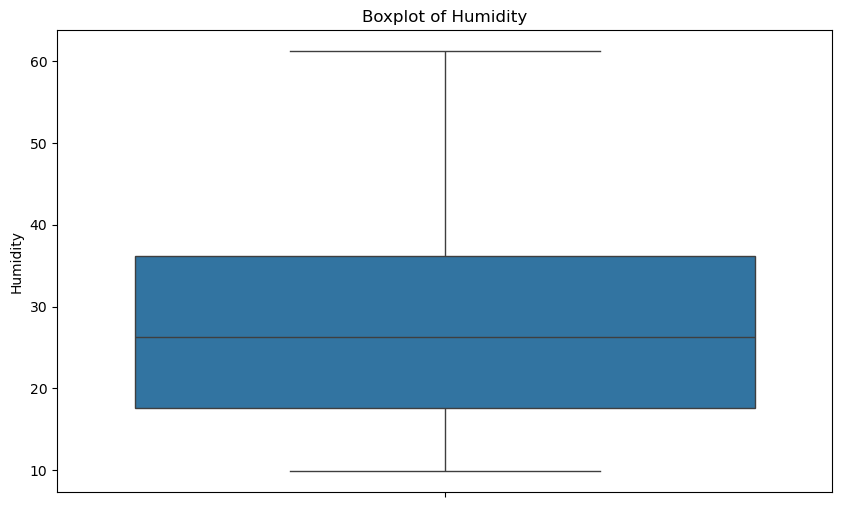

In [313]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Humidity'])
plt.title('Boxplot of Humidity')
plt.ylabel('Humidity')
plt.show()

When it comes to humidiuty, the plot shows that the median humidity is around 30% with no outliers. 

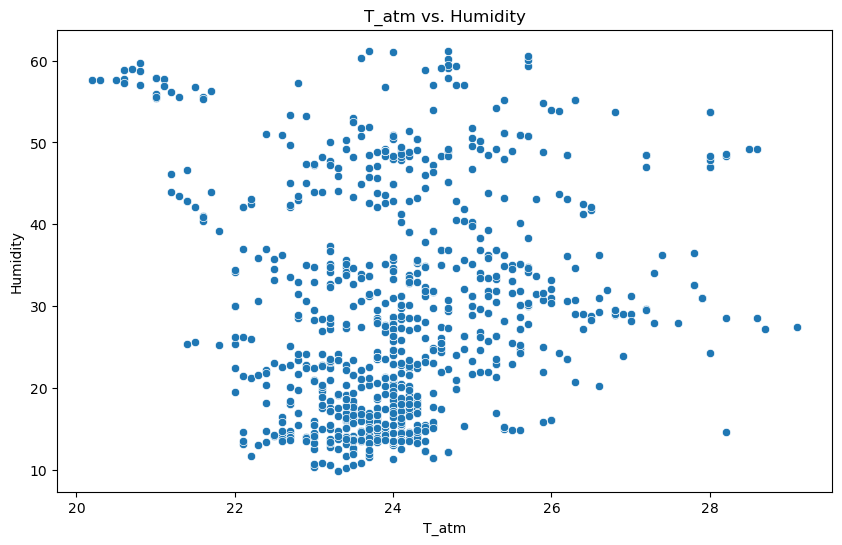

In [314]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='T_atm', y='Humidity', data=df)
plt.title('T_atm vs. Humidity')
plt.xlabel('T_atm')
plt.ylabel('Humidity')
plt.show()

This plot highlights the relationship between ambient temperature and humidity. More specifically it highlights a negative relationship between the two, as there is no clear linear relationship however most of the points seem to be clustered in the lower left corner, with the points being betwen lower to mid-temperature range and mid-humidity levels.

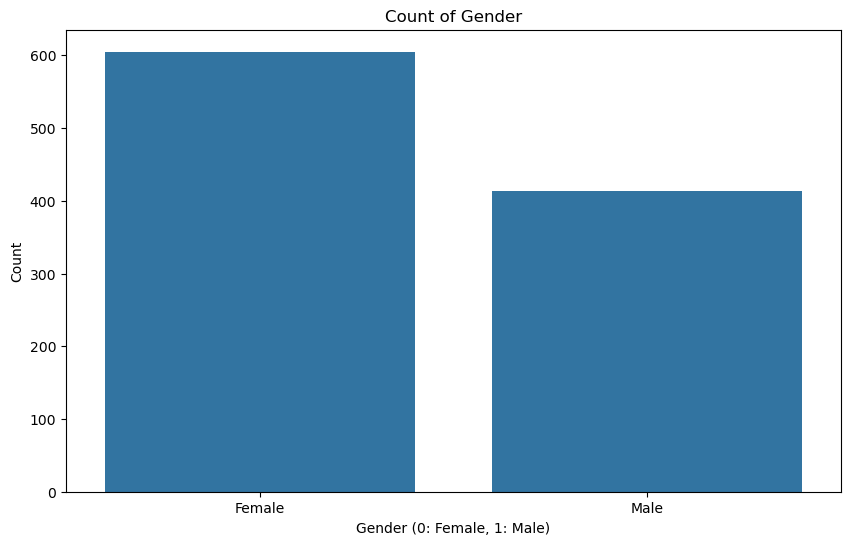

In [315]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender_Male', data=df)
plt.title('Count of Gender')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

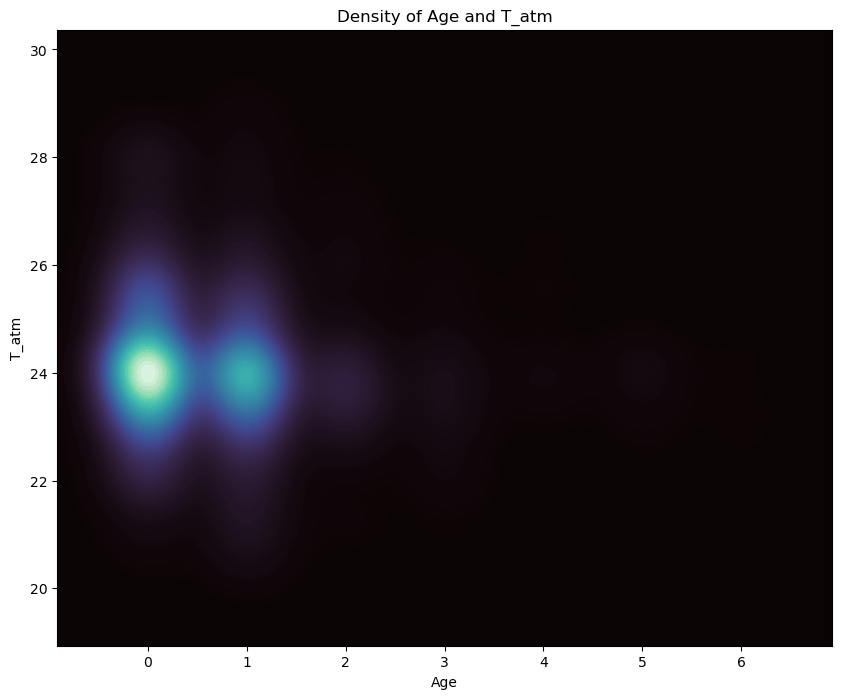

In [316]:
plt.figure(figsize=(10, 8))
sns.kdeplot(data=df, x='Age', y='T_atm', fill=True, thresh=0, levels=100, cmap="mako")
plt.title('Density of Age and T_atm')
plt.xlabel('Age')
plt.ylabel('T_atm')
plt.show()

In this density plot, the more data there is in the dataframe, the more brighter the points on the plot are. The darkness represents either lack of data or lack of correlation. In this density plot, it seems that the age data is much brighter for age brackets 0 and 1 where the majority of them are around mid-temperature. 

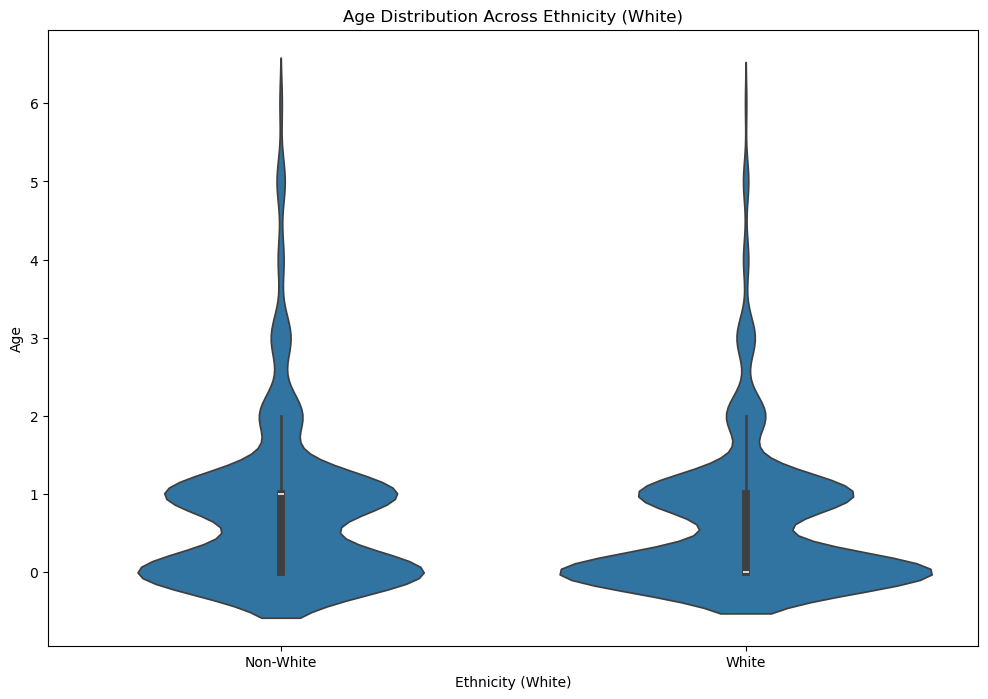

In [317]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Ethnicity_White', y='Age', data=df)
plt.title('Age Distribution Across Ethnicity (White)')
plt.xlabel('Ethnicity (White)')
plt.ylabel('Age')
plt.xticks([0, 1], ['Non-White', 'White'])
plt.show()

A violing plot is used to render the distribution of ages brackets for two ethnicity categories. The shape of the violin represents the distribution of age, with the widest shape illustrating the majority of the ages found in data. The white small dot represents the median age of group. 

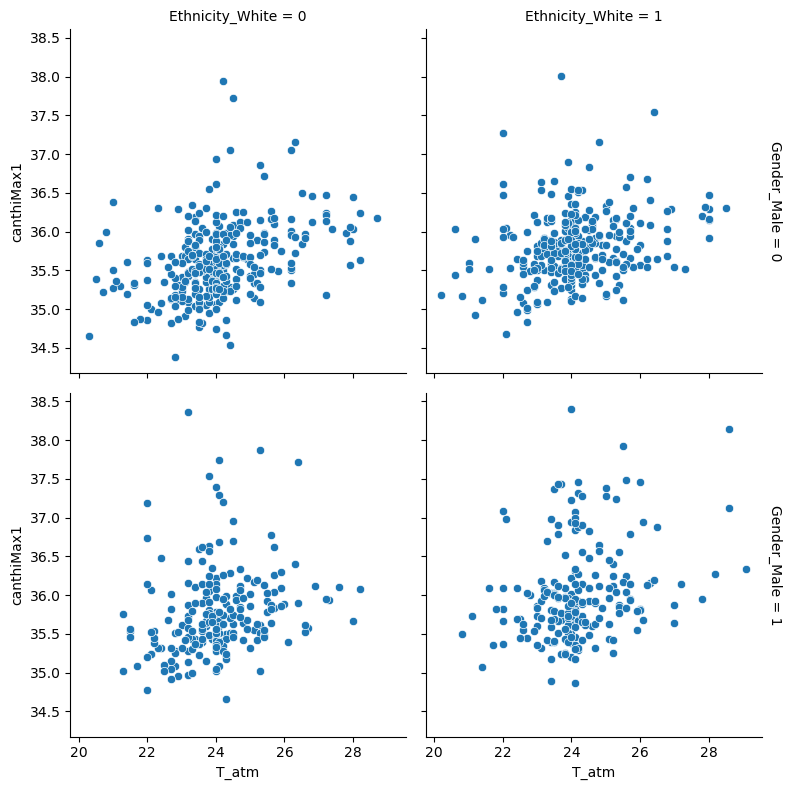

In [318]:
g = sns.FacetGrid(df, col="Ethnicity_White", row="Gender_Male", margin_titles=True, height=4)
g.map(sns.scatterplot, "T_atm", "canthiMax1")
g.add_legend()
plt.show()

The grid of scatterplots highlights the data distribution between ethnicitities, ambient temperatures, gender and the max value in the extended canthi area. 

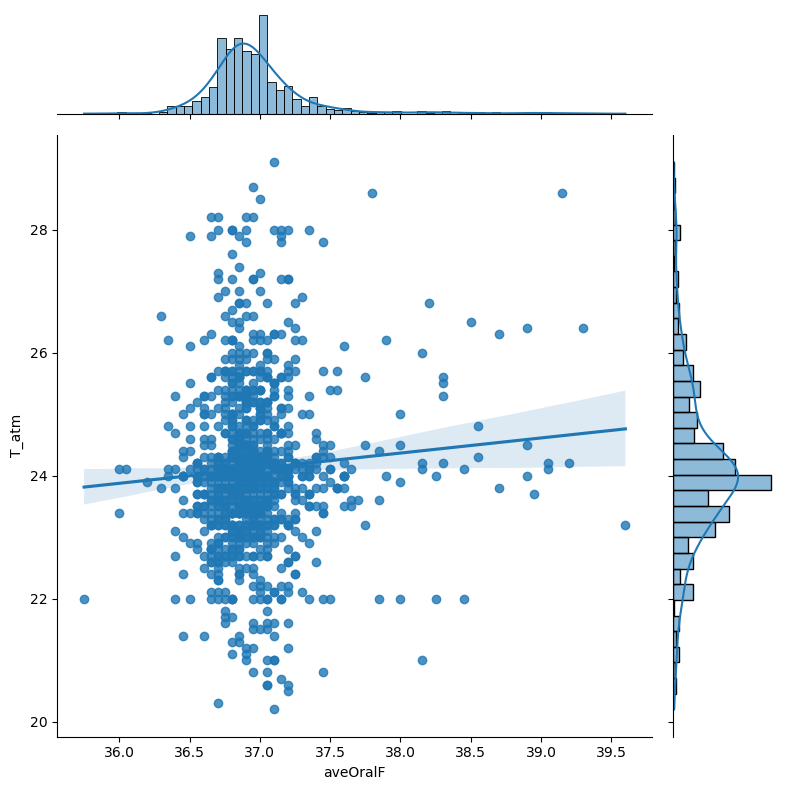

In [319]:
sns.jointplot(x='aveOralF', y='T_atm', data=df, kind='reg', height=8)
plt.show()

The joint plot above renders a positive correlation between the average temperature taken from the forehead of patients and the ambient temperature. The regression line is a direct upwards line which is described as the best fit linear regression line for the given data. The shaded area is the confidence interval (the closer it is to the line the better) and it seems that the data is more confident around the temperatures between 36.0 and 37.5, or it could also mean that there is not a lot of data from patients of over 38.0 temperature. It also shows that most of the temperatures collected from the forehead do not qualify to have fever. 

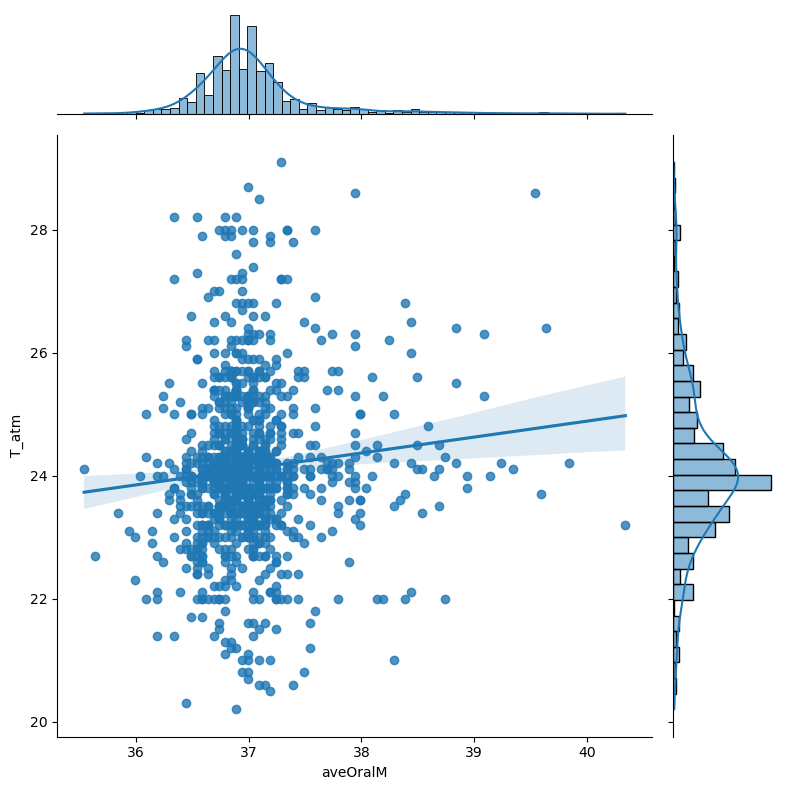

In [320]:
sns.jointplot(x='aveOralM', y='T_atm', data=df, kind='reg', height=8)
plt.show()

Most of the above descriptions show the same results for aveOralM as for aveOralF. The only clear difference is that there are more temperatures above 37.5 (mostly between 38.0 and 39.5) in this case, meaning that the temperatures taken from the mouth are better read by the thermometre.  

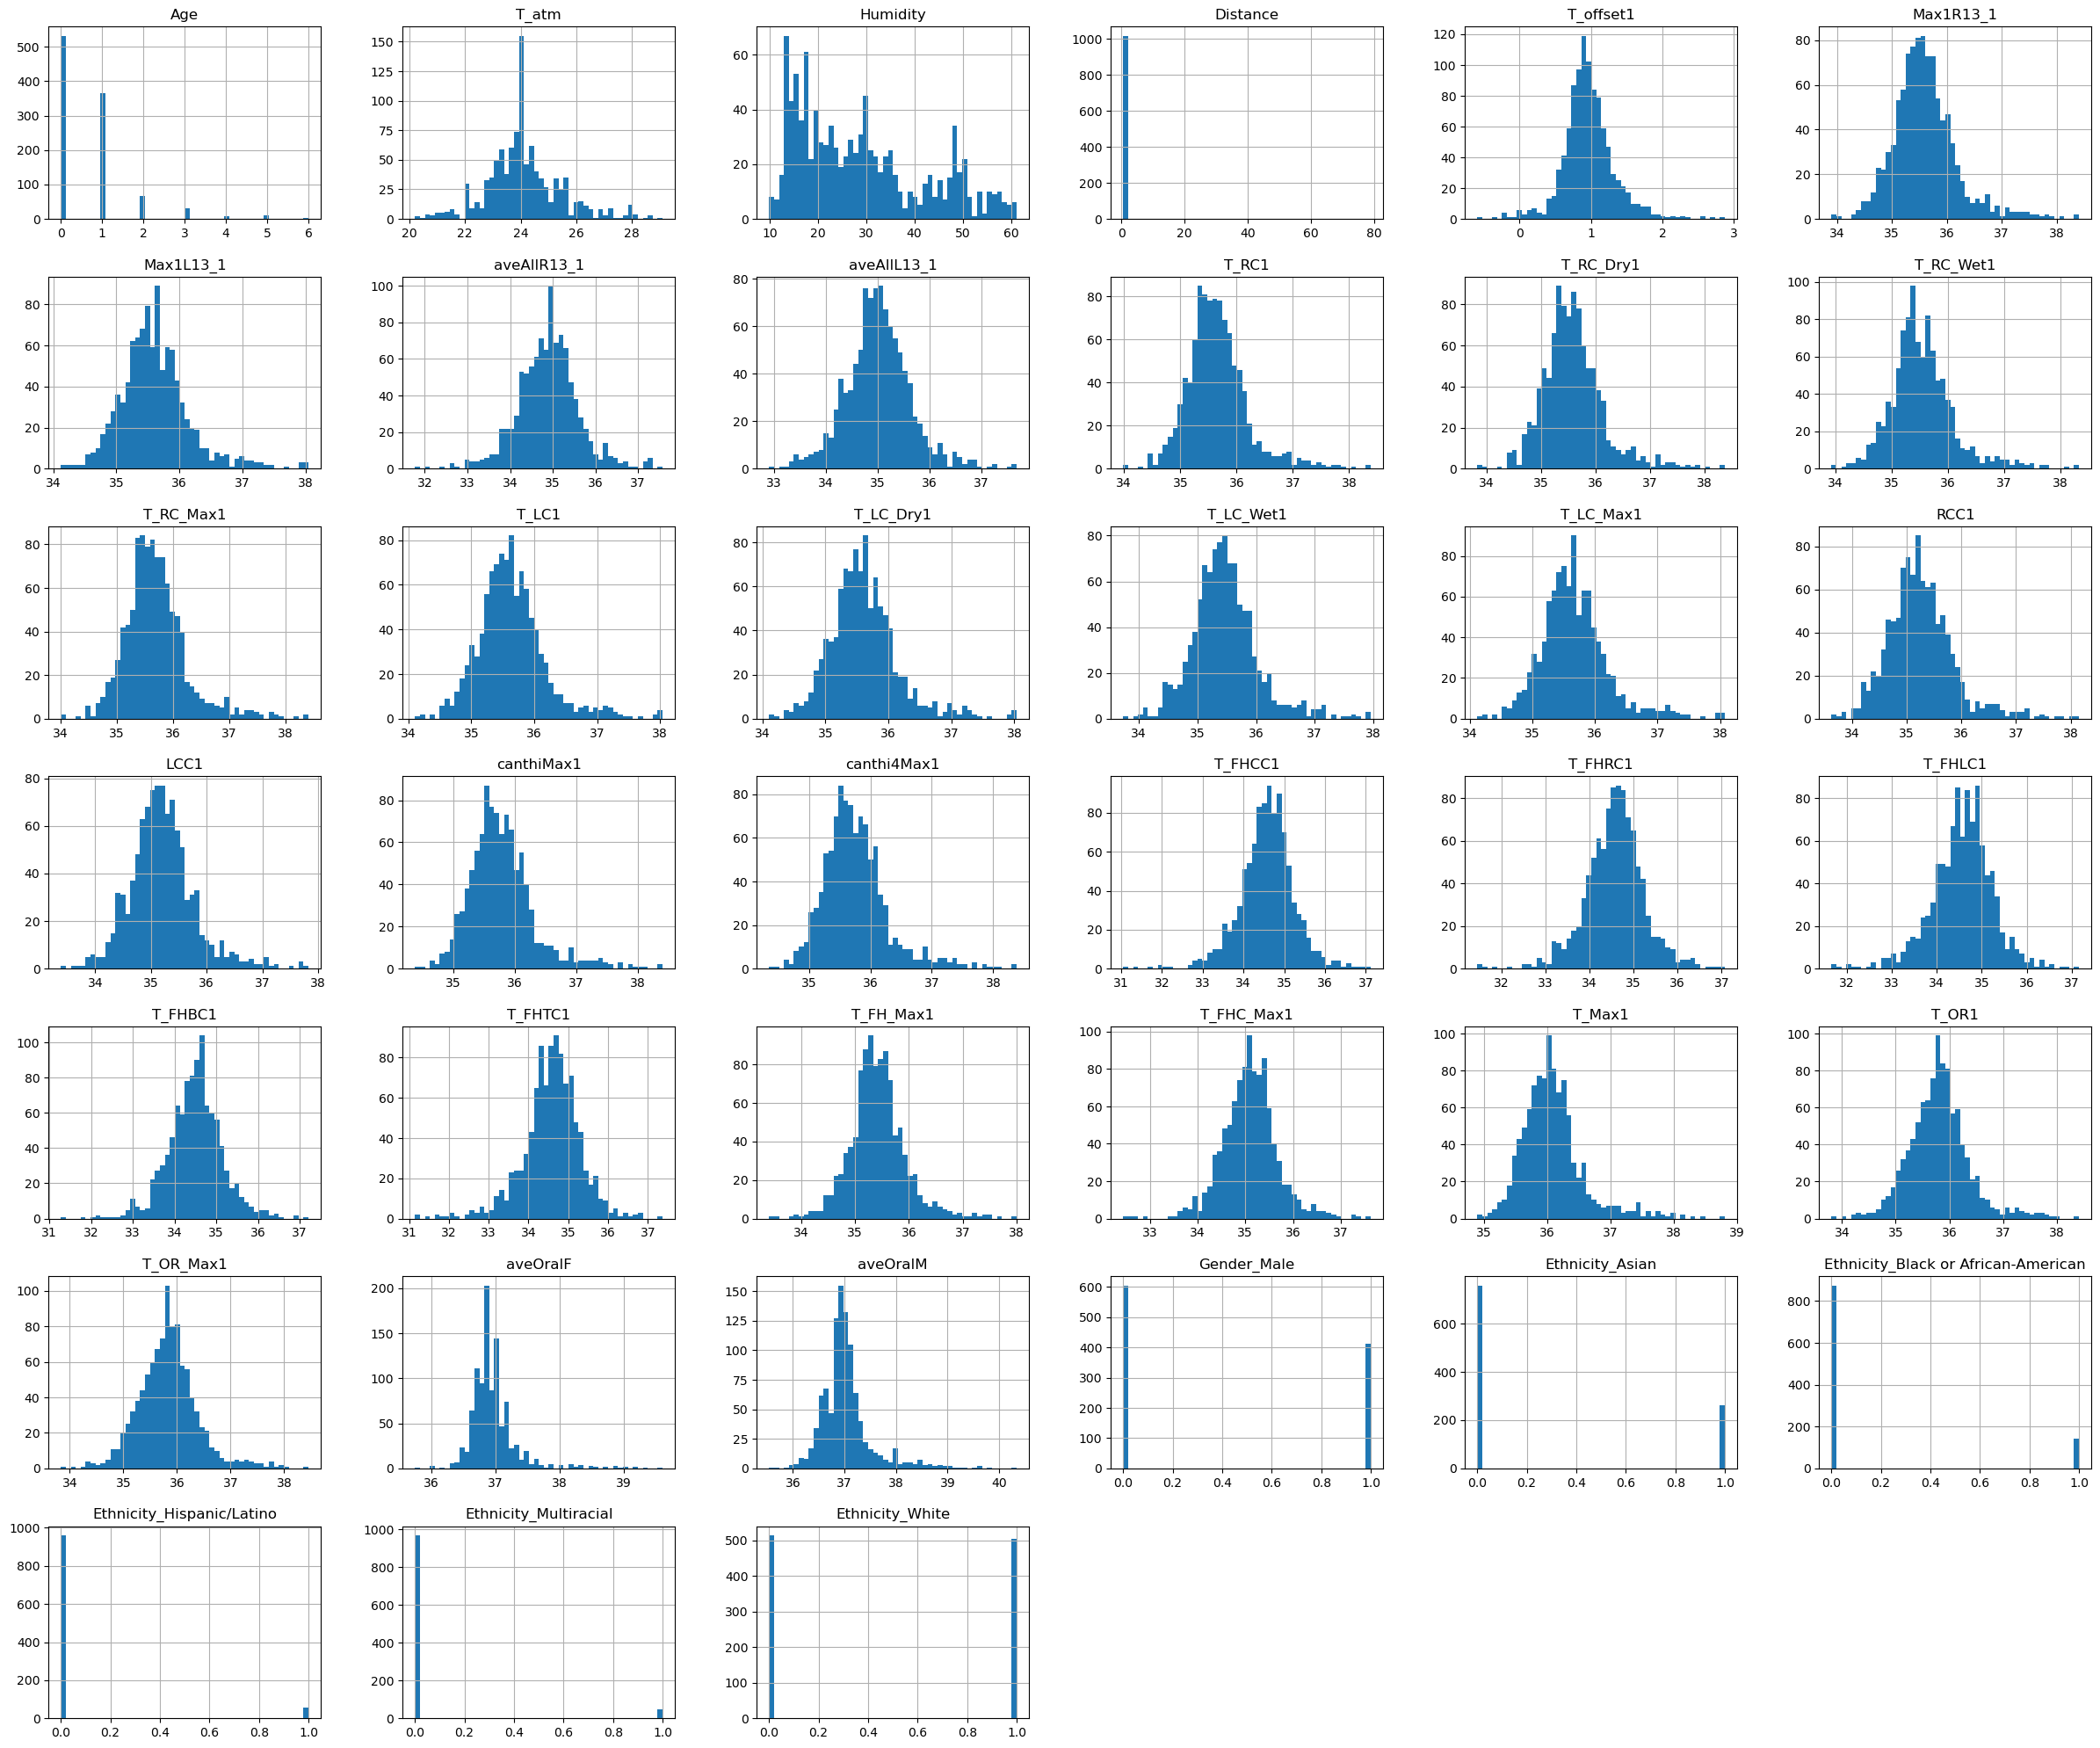

In [321]:
%matplotlib inline
df.hist(bins=50, figsize=(30,25))
plt.title("attribute_histogram_plots")
plt.show()

The histogram is a simple and easy to understand visualisation used to illustrate the distribution of each variable. 

## IV. Data split and normalisation

In [322]:
#this creates the categorical features for classification
df['aveOralF_has_fever'] = np.where(df['aveOralF'] >=37.5, 1, 0)
df['aveOralM_has_fever'] = np.where(df['aveOralM'] >=37.5, 1, 0)

In [323]:
# 4 different training sets for each of the targets

X = df.drop(['aveOralF', 'aveOralM', 'aveOralF_has_fever', 'aveOralM_has_fever'], axis=1)

y_reg_f = df['aveOralF']

X_train_reg_f, X_test_reg_f, y_train_reg_f, y_test_reg_f = train_test_split(X, y_reg_f, test_size=0.4, random_state=42)


X_test_reg_f, X_validation_reg_f, y_test_reg_f, y_validation_reg_f = train_test_split(X_test_reg_f, y_test_reg_f, test_size=0.3, random_state=42)


y_reg_m = df['aveOralM']
X_train_reg_m, X_test_reg_m, y_train_reg_m, y_test_reg_m = train_test_split(X, y_reg_m, test_size=0.4, random_state=42)


X_test_reg_m, X_validation_reg_m, y_test_reg_m, y_validation_reg_m = train_test_split(X_test_reg_m, y_test_reg_m, test_size=0.3, random_state=42)


y_cf_f = df['aveOralF_has_fever']
X_train_cf_f, X_test_cf_f, y_train_cf_f, y_test_cf_f = train_test_split(X, y_cf_f, test_size=0.4, random_state=42, stratify=y_cf_f)

X_test_cf_f, X_validation_cf_f, y_test_cf_f, y_validation_cf_f = train_test_split(X_test_cf_f, y_test_cf_f, test_size=0.4, random_state=42, stratify=y_test_cf_f)


y_cf_m = df['aveOralM_has_fever']
X_train_cf_m, X_test_cf_m, y_train_cf_m, y_test_cf_m = train_test_split(X, y_cf_m, test_size=0.4, random_state=42, stratify=y_cf_m)
X_test_cf_m, X_validation_cf_m, y_test_cf_m, y_validation_cf_m = train_test_split(X_test_cf_m, y_test_cf_m, test_size=0.4, random_state=42, stratify=y_test_cf_m)

In [324]:
# normalising data
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)


In [325]:
X_train_reg_f.head(5)

,Age,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,...,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,Gender_Male,Ethnicity_Asian,Ethnicity_Black or African-American,Ethnicity_Hispanic/Latino,Ethnicity_Multiracial,Ethnicity_White
430,0,27.0,29.1,0.60,1.6050,35.4750,35.5550,34.6725,35.1050,35.4825,...,35.6025,35.9025,35.5675,35.5825,1,0,0,0,0,1
668,1,24.2,17.7,0.54,0.9175,36.2150,35.7500,35.3525,34.9425,36.2500,...,34.9325,36.6725,36.5225,36.5600,1,0,0,0,0,1
185,1,23.0,20.9,0.70,0.6800,35.1200,35.0925,33.7450,34.2275,35.2125,...,34.4375,35.7850,35.3275,35.3525,0,0,0,0,1,0
41,0,23.2,23.2,0.80,0.7175,35.5875,35.7450,34.7350,35.0375,35.5775,...,35.5350,36.0325,35.8125,35.8450,0,0,0,0,0,1
705,0,24.4,13.5,0.60,0.9325,35.4800,35.5300,34.9000,34.9900,35.5650,...,35.1175,35.9825,35.7600,35.8100,0,0,0,0,0,1


## V. aveOralF

### Task 1. Regression

#### Linear Regression Model and coefficients

In [326]:
#linear regression model 

model = LinearRegression()
model.fit(X_train_reg_f, y_train_reg_f)
y_pred_lm_F = model.predict(X_test_reg_f)
print("R^2: ", r2_score(y_test_reg_f, y_pred_lm_F))
print("MSE: ", mean_squared_error(y_test_reg_f, y_pred_lm_F))
print("RMSE: ", mean_squared_error(y_test_reg_f, y_pred_lm_F)**0.5)

#calculating the coefficients 
coefficients = pd.DataFrame()
coefficients['feature'] = list(X_train_reg_f.columns)
coefficients['coefficient'] =  model.coef_
coefficients.head()

R^2:  -10.128587437375197
MSE:  1.5283856071494217
RMSE:  1.2362789358188635


,feature,coefficient
0,Age,0.008042
1,T_atm,-0.062619
2,Humidity,-0.000193
3,Distance,-0.257169
4,T_offset1,0.103023


As mentioned in the methodology, a positive coefficient shows a positive relationship between the dependent variable and the independent variable. In this case, the dataframe above shows that the Age is positively affecting the independent variable, however in a rather small percentage. 

The T_atm, Humidity and Distance features are negatively impacting the independent variable, also in a small percentage. 

The T_offset1 with the 0.103023 coefficient shows that with each unit increase in T_offset1, the depenent variable is raised by 0.103023 units. 

#### Polynomial model

In [327]:
#applying polynomial regression degree 2
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(X_train_reg_f)
x_test_trans = poly.transform(X_test_reg_f)

In [328]:
#fitting a simple linear regression for x_train_trans
model_poly = LinearRegression()
model_poly.fit(x_train_trans, y_train_reg_f)
y_pred_poly_F = model.predict(X_test_reg_f)

In [329]:
print(model_poly.coef_)
print(model_poly.intercept_)

[ 4.13141491e-02 -2.95425085e+00  1.52302584e+00  2.84902023e-01
  5.68363487e+01 -1.67732013e+01  3.33061862e+01  1.82614821e+00
  3.82130017e+00 -3.71101044e+00 -1.16720029e+00 -4.66672788e+00
 -1.40095484e+01 -2.44264403e+00  2.66464845e+00  1.05478681e+01
 -1.31383433e+01 -3.61895028e+00 -2.90541917e+00  2.21739137e+01
 -2.81050321e+01 -1.73684293e+01 -6.24160982e+00 -7.32214898e+00
  1.02042037e+01  2.69967510e+01 -6.88126687e+00  5.84515938e+00
 -9.40247282e+00  2.39163182e+01 -1.19003268e+01 -6.89801366e+00
 -7.04232199e-01 -1.23845127e+00 -6.86191158e+00  6.62097312e+00
  1.58660187e+00 -1.08370169e-01  2.51207168e-03 -4.78065120e-02
 -2.88090050e-03  3.47201036e-01  6.39574659e-02 -1.27840205e+00
  1.88786305e+00  4.96095393e-02  4.34576767e-02 -1.14474397e-01
  1.32726195e+00 -6.66222056e-01  2.96806423e-01  7.38920086e+00
  9.46440932e-01  1.45912851e+00 -1.09484713e+01  5.40709421e-01
 -7.67501676e-01  2.65319476e+00 -2.48186942e+00 -2.47719845e-01
 -3.12686372e-01  2.48578

In [330]:
print("R^2: ", r2_score(y_test_reg_f, y_pred_poly_F))
print("MSE: ", mean_squared_error(y_test_reg_f, y_pred_poly_F))
print("RMSE: ", mean_squared_error(y_test_reg_f, y_pred_poly_F)**0.5)

R^2:  -10.128587437375197
MSE:  1.5283856071494217
RMSE:  1.2362789358188635


#### Random Forest

In [331]:
# random forest model and its performance measures 

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=3)
forest_reg.fit(X_train_reg_f, y_train_reg_f)
y_pred_rf_reg_f = forest_reg.predict(X_test_reg_f)

print("R^2: ", r2_score(y_test_reg_f, y_pred_rf_reg_f))
print("MSE: ", mean_squared_error(y_test_reg_f, y_pred_rf_reg_f))
print("RMSE: ", mean_squared_error(y_test_reg_f, y_pred_rf_reg_f)**0.5)

R^2:  0.5232727808762989
MSE:  0.06547309120274901
RMSE:  0.2558771017554111


#### Random forest grid search regressor

In [332]:
# RandomForest grid search

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4], 'max_depth':[3]},
  ]

forest_reg_f = RandomForestRegressor(random_state=42)
grid_search_reg_f = GridSearchCV(forest_reg_f, param_grid, cv=3, n_jobs=-1,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

In [333]:
grid_search_reg_f.fit(X_train_reg_f, y_train_reg_f)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_depth': [3],
                          'max_features': [2, 3, 4], 'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [334]:
best_forest = grid_search_reg_f.best_estimator_
tree_to_plot = best_forest.estimators_[0]

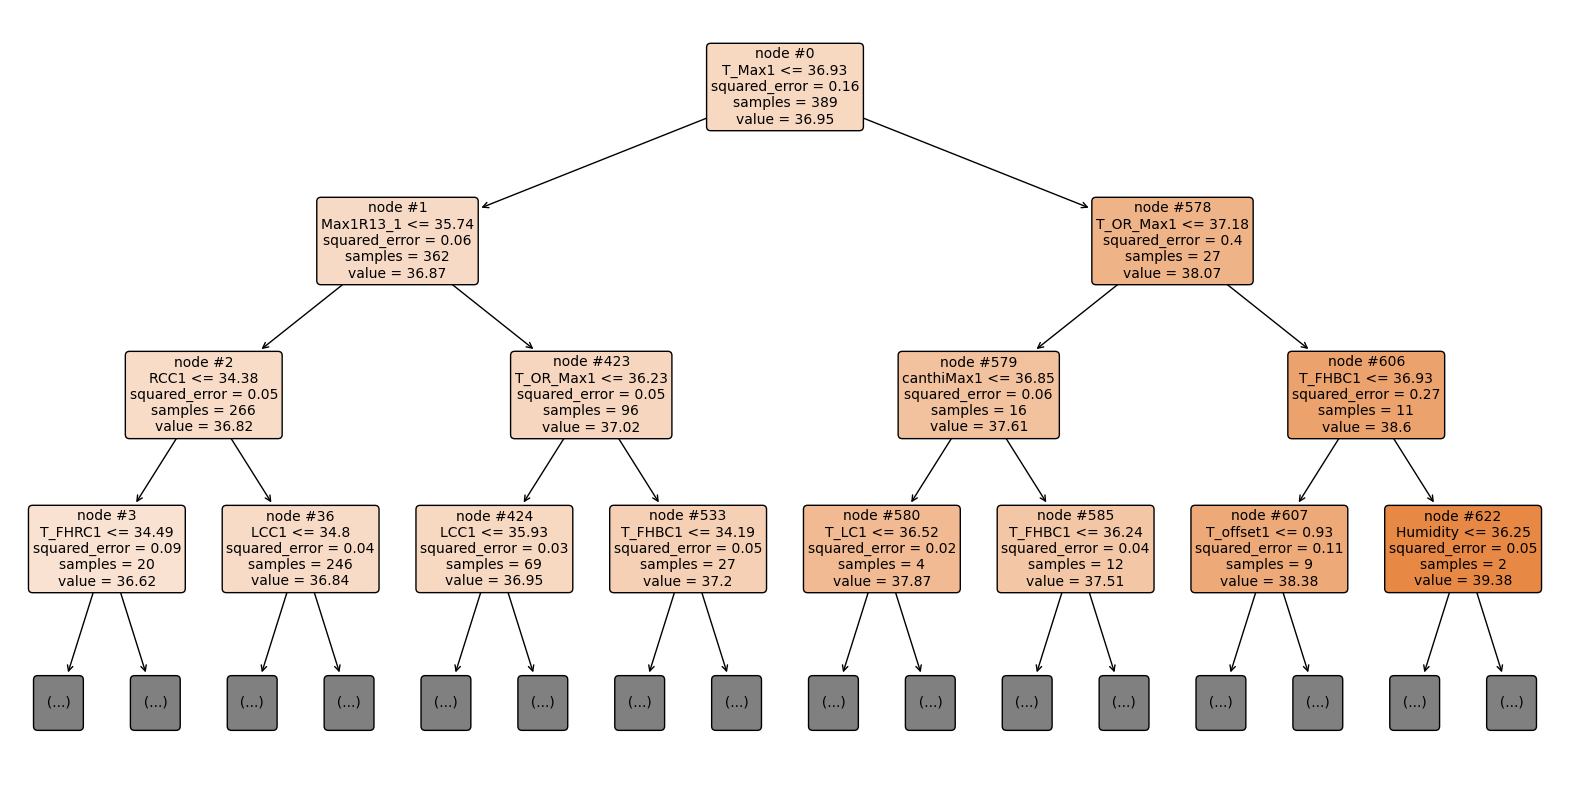

In [335]:
# plotting the best tree extracted from the RF grid search

plt.figure(figsize=(20, 10)) 
plot_tree(tree_to_plot,
          filled=True,
          feature_names=X_train_reg_f.columns,
          rounded=True,
          precision=2,
          max_depth=3,
          fontsize=10, 
          proportion=False, 
          node_ids=True, 
          )
plt.show()

In [336]:
y_pred_rf_gs_f = best_forest.predict(X_test_reg_f)
print("R^2: ", r2_score(y_test_reg_f, y_pred_rf_gs_f))
print("MSE: ", mean_squared_error(y_test_reg_f, y_pred_rf_gs_f))
print("RMSE: ", mean_squared_error(y_test_reg_f, y_pred_rf_gs_f)**0.5)

R^2:  0.5343780763494186
MSE:  0.06394790448343068
RMSE:  0.2528792290470506


In [337]:
#feature_importances_ : they are computed as the mean and standard deviation of accumulation of the impurity decrease within each tree
trees_feature_imp_f = tree_to_plot.feature_importances_
trees_feature_imp_f

array([2.69748107e-03, 2.81137424e-03, 1.93448231e-02, 6.40376090e-04,
       1.28196998e-02, 4.70449623e-02, 2.86313133e-03, 4.03451230e-03,
       1.53679579e-02, 4.15769909e-03, 2.58776604e-03, 7.62417948e-03,
       8.58782433e-03, 1.64473553e-02, 7.67666219e-03, 6.99339225e-03,
       6.14475879e-03, 1.88398263e-02, 1.75075426e-02, 1.07416692e-02,
       4.44494630e-03, 7.45861899e-03, 1.62121252e-02, 8.32715431e-03,
       4.06525224e-02, 1.07019489e-02, 6.72968313e-03, 4.93210947e-03,
       5.26829209e-01, 1.51867772e-02, 1.40908161e-01, 6.95774645e-04,
       9.48738523e-04, 5.45489547e-04, 0.00000000e+00, 4.93747858e-04,
       1.16895760e-13])

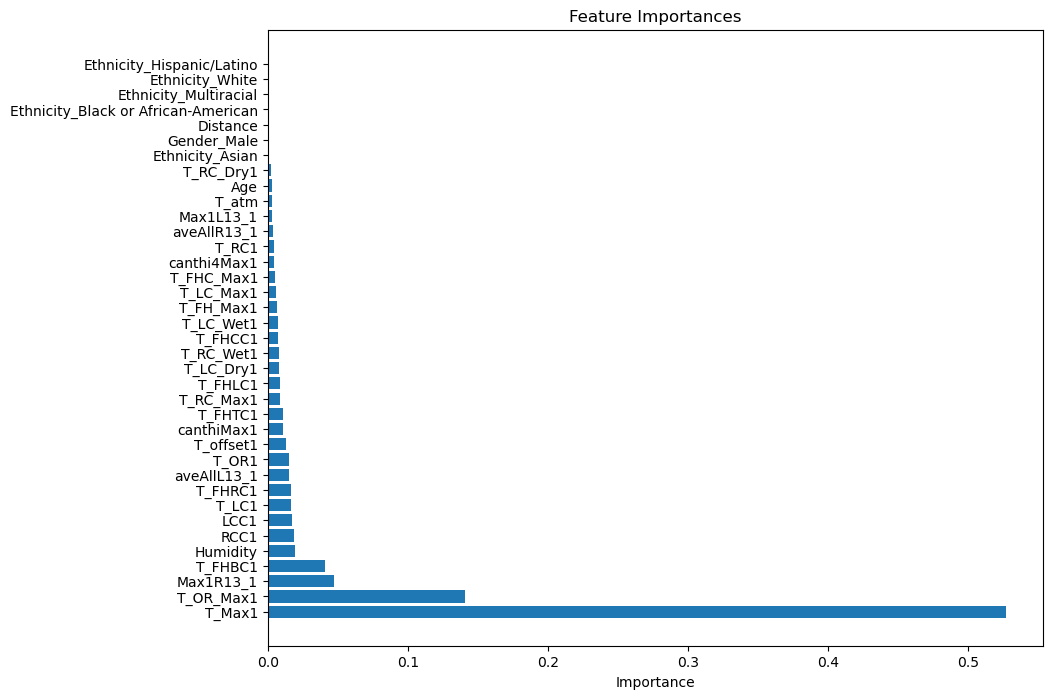

In [338]:
trees_feature_imp_f = tree_to_plot.feature_importances_

# creating a data frame that mapps the feature names to their importance scores
feature_imp_df = pd.DataFrame({
    'Feature': X_train_reg_f.columns,  
    'Importance': trees_feature_imp_f
}).sort_values('Importance', ascending=False)  # sort df by importance

# Plot
plt.figure(figsize=(10, 8))
plt.barh(feature_imp_df['Feature'], feature_imp_df['Importance'])  
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

#### Lasso model and coefficients

In [339]:
# this is the Lasso model

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_reg_f, y_train_reg_f)
y_pred_lasso_f = lasso_model.predict(X_test_reg_f)

print("R^2: ", r2_score(y_test_reg_f, y_pred_lasso_f))
print("MSE: ", mean_squared_error(y_test_reg_f, y_pred_lasso_f))
print("RMSE: ", mean_squared_error(y_test_reg_f, y_pred_lasso_f)**0.5)

# coefficients = pd.DataFrame()
# coefficients['feature'] = list(X_train_reg_f.columns)
# coefficients['coefficient'] =  model.coef_
# coefficients.head()

R^2:  0.3245343753281429
MSE:  0.09276756324036722
RMSE:  0.3045776801414825


#### Ridge model

In [340]:
ridge_model = Ridge()
ridge_model.fit(X_train_reg_f, y_train_reg_f)
y_pred_ridge_f = ridge_model.predict(X_test_reg_f)

print("R^2: ", r2_score(y_test_reg_f, y_pred_ridge_f))
print("MSE: ", mean_squared_error(y_test_reg_f, y_pred_ridge_f))
print("RMSE: ", mean_squared_error(y_test_reg_f, y_pred_ridge_f)**0.5)

R^2:  -4.880255274302079
MSE:  0.8075865493426476
RMSE:  0.8986581938326983


------------

#### Results

In [341]:
#identifying the best model for the regression of aveOralF

model_metrics_reg_F = [
    {"Model": "Linear Regression", "R^2: ": r2_score(y_test_reg_f, y_pred_lm_F), "MSE: ": mean_squared_error(y_test_reg_f, y_pred_lm_F), "RMSE: ": mean_squared_error(y_test_reg_f, y_pred_lm_F)**0.5},
    {"Model": "Polynomial Model", "R^2: " :r2_score(y_test_reg_f, y_pred_poly_F), "MSE: ": mean_squared_error(y_test_reg_f, y_pred_poly_F), "RMSE: ": mean_squared_error(y_test_reg_f, y_pred_poly_F)**0.5},
    {"Model": "Random Forest", "R^2: " : r2_score(y_test_reg_f, y_pred_rf_reg_f), "MSE: ": mean_squared_error(y_test_reg_f, y_pred_rf_reg_f), "RMSE: ": mean_squared_error(y_test_reg_f, y_pred_rf_reg_f)**0.5},
     {"Model": "Random Forest GS", "R^2: ": r2_score(y_test_reg_f, y_pred_rf_gs_f), "MSE: ": mean_squared_error(y_test_reg_f, y_pred_rf_gs_f), "RMSE: ": mean_squared_error(y_test_reg_f, y_pred_rf_gs_f)**0.5},
    {"Model": "Lasso", "R^2: " :r2_score(y_test_reg_f, y_pred_lasso_f), "MSE: ": mean_squared_error(y_test_reg_f, y_pred_lasso_f), "RMSE: ": mean_squared_error(y_test_reg_f, y_pred_lasso_f)**0.5},
    {"Model": "Ridge", "R^2: " :r2_score(y_test_reg_f, y_pred_ridge_f), "MSE: ": mean_squared_error(y_test_reg_f, y_pred_ridge_f), "RMSE: ": mean_squared_error(y_test_reg_f, y_pred_ridge_f)**0.5}
]


regs_f = pd.DataFrame(model_metrics_reg_F)
print(regs_f)

               Model      R^2:      MSE:     RMSE: 
0  Linear Regression -10.128587  1.528386  1.236279
1   Polynomial Model -10.128587  1.528386  1.236279
2      Random Forest   0.523273  0.065473  0.255877
3   Random Forest GS   0.534378  0.063948  0.252879
4              Lasso   0.324534  0.092768  0.304578
5              Ridge  -4.880255  0.807587  0.898658


----------------

### Task 2. Classification

In [342]:
# checking class proportions
print("Positive class proportion ", np.round(df['aveOralF_has_fever'].sum() / len(df) * 100 , 2), "%")

Positive class proportion  6.39 %


In [343]:
# oversampling the minority class because we don't have enough data points to undersample the majority class (data is imbalanced)
smote = SMOTE(random_state=42)
X_train_cf_f, y_train_cf_f = smote.fit_resample(X_train_cf_f, y_train_cf_f)


#### SGD Classifier

In [344]:
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train_cf_f, y_train_cf_f)

cross_val_score(sgd_clf, X_train_cf_f, y_train_cf_f, cv=3, n_jobs=-1, scoring="accuracy")

y_pred_sgdF = sgd_clf.predict(X_test_cf_f)

In [345]:
print("Accuracy: ", accuracy_score(y_test_cf_f, y_pred_sgdF))
print("Precision: ", precision_score(y_test_cf_f, y_pred_sgdF))
print("Recall: ", recall_score(y_test_cf_f, y_pred_sgdF))
print("F1 Score: ", f1_score(y_test_cf_f, y_pred_sgdF))

Accuracy:  0.4057377049180328
Precision:  0.08387096774193549
Recall:  0.8125
F1 Score:  0.15204678362573099


In [346]:
confusion_matrix(y_test_cf_f, y_pred_sgdF)

array([[ 86, 142],
       [  3,  13]], dtype=int64)

According to the confusion matrix, this first model seems to struggle to identify the positive class (low True Positives). It has too high of a False Positives number, however it seems to be better at seeing the negative class. 

##### ROC Curve

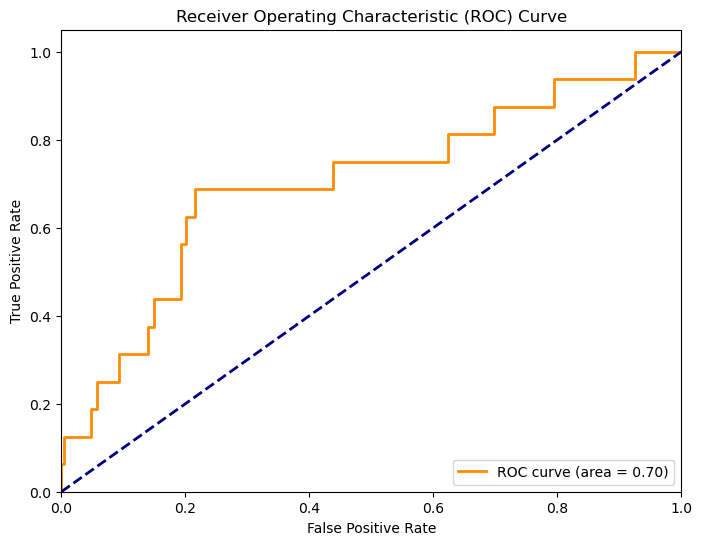

In [347]:
y_scores = sgd_clf.decision_function(X_test_cf_f)

fpr, tpr, _ = roc_curve(y_test_cf_f, y_scores)
roc_auc = auc(fpr, tpr)

roc_auc_direct = roc_auc_score(y_test_cf_f, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

ROC curves usually plot the true positive rate and the false positive rate, where the closer the orange line is to the left-hand border and the top border, the more effective it is. The AUC (are under the curve) is 0.70 which means that the SGD model is good at distinguishing between positives and negatives, with room for improvement. 

#### Random Forest classifier and grid search

In [348]:
rf_classifier_aveOralF = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_aveOralF.fit(X_train_cf_f, y_train_cf_f)
y_pred_rfF = rf_classifier_aveOralF.predict(X_test_cf_f)


In [349]:
print("Accuracy: ", accuracy_score(y_test_cf_f, y_pred_rfF))
print("Precision: ", precision_score(y_test_cf_f, y_pred_rfF))
print("Recall: ", recall_score(y_test_cf_f, y_pred_rfF))
print("F1 Score: ", f1_score(y_test_cf_f, y_pred_rfF))

Accuracy:  0.9344262295081968
Precision:  0.5
Recall:  0.75
F1 Score:  0.6


In [350]:
# performing the RF grid search classifier

param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'bootstrap': [True, False] 
}


rf_classifier_aveOralF = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf_classifier_aveOralF, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train_cf_f, y_train_cf_f)
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_estimator = grid_search.best_estimator_
y_pred_rf_gsF = best_estimator.predict(X_test_cf_f) #this gets the final results of the best model

accuracy = accuracy_score(y_test_cf_f, y_pred_rf_gsF)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Score: 0.984245001149161


In [351]:
print("Accuracy: ", accuracy)

Accuracy:  0.9344262295081968


In [352]:
# this calculates the accuracy on the train set for comparison with the above test set
y_pred_train = best_estimator.predict(X_train_cf_f)
print("Accuracy: ", accuracy_score(y_train_cf_f, y_pred_train))

Accuracy:  1.0


##### ROC curve

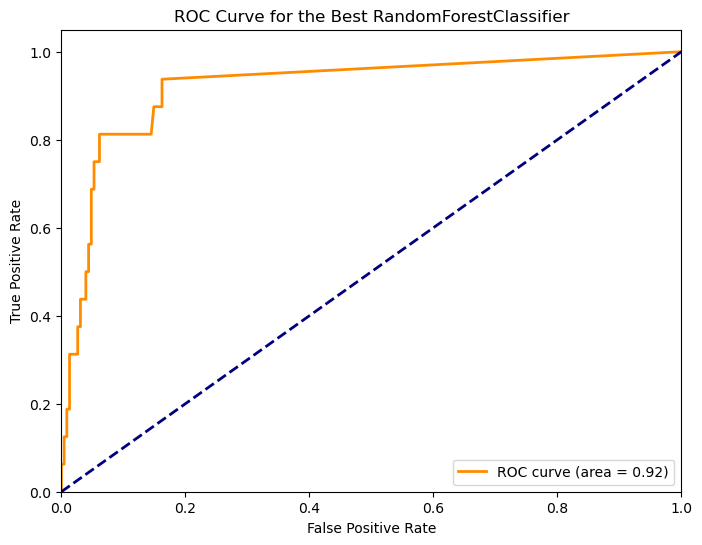

AUC Score:  0.9199561403508772


In [353]:
y_scores_best = best_estimator.predict_proba(X_test_cf_f)[:, 1]

fpr_best, tpr_best, _ = roc_curve(y_test_cf_f, y_scores_best)
roc_auc_best = auc(fpr_best, tpr_best)

plt.figure(figsize=(8, 6))
plt.plot(fpr_best, tpr_best, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_best)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for the Best RandomForestClassifier')
plt.legend(loc="lower right")
plt.show()

print("AUC Score: ", roc_auc_score(y_test_cf_f, y_scores_best))

The Random forest model seems to be better at identifying the differences between positives and negatives than the SGD, with an AUC of 0.92. 

##### Precision/Recall plot

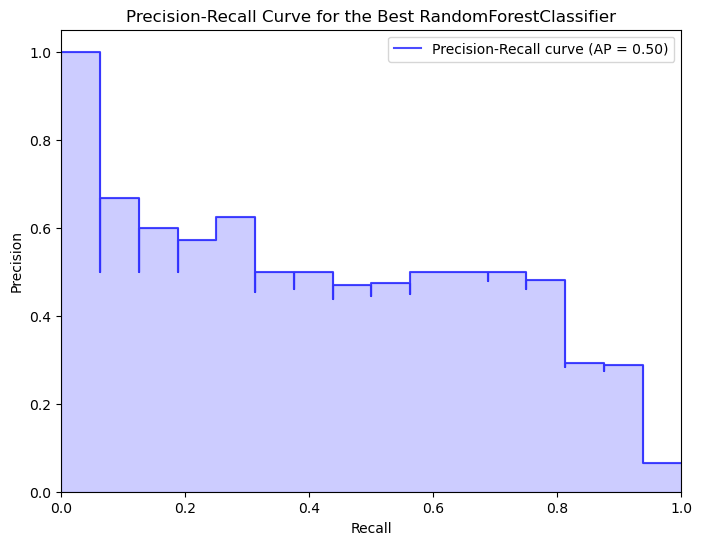

In [354]:
y_scores_best = best_estimator.predict_proba(X_test_cf_f)[:, 1]

precision, recall, _ = precision_recall_curve(y_test_cf_f, y_scores_best)

average_precision = average_precision_score(y_test_cf_f, y_scores_best)

plt.figure(figsize=(8, 6))
plt.step(recall, precision, where='post', color='blue', alpha=0.7,
         label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.fill_between(recall, precision, step='post', alpha=0.2, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve for the Best RandomForestClassifier')
plt.legend(loc="upper right")
plt.show()

#### XGBoost grid search classifier

In [355]:
param_grid = {
    'n_estimators': [100, 200],  
    'learning_rate': [0.01, 0.1],  
    'max_depth': [4, 6, 8], 
    'min_child_weight': [1, 5],  
    'subsample': [0.8, 1.0],  
    'colsample_bytree': [0.8, 1.0],  
}

xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

grid_search.fit(X_train_cf_f, y_train_cf_f)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_estimator = grid_search.best_estimator_
y_pred_xgbF = best_estimator.predict(X_test_cf_f)

accuracy = accuracy_score(y_test_cf_f, y_pred_xgbF)
print(f"Accuracy of the best model: {accuracy*100:.2f}%")

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}
Best Score: 0.9824906151842487
Accuracy of the best model: 92.21%


In [356]:
y_pred_train = best_estimator.predict(X_train_cf_f)
accuracy_train = accuracy_score(y_train_cf_f, y_pred_train)

print(f"Accuracy of the best model on the trains set: {accuracy_train*100:.2f}%")

Accuracy of the best model on the trains set: 100.00%


In [357]:
print("Accuracy: ", accuracy_score(y_test_cf_f, y_pred_xgbF))
print("Precision: ", precision_score(y_test_cf_f, y_pred_xgbF))
print("Recall: ", recall_score(y_test_cf_f, y_pred_xgbF))
print("F1 Score: ", f1_score(y_test_cf_f, y_pred_xgbF))

Accuracy:  0.9221311475409836
Precision:  0.42105263157894735
Recall:  0.5
F1 Score:  0.45714285714285713


##### ROC Curve

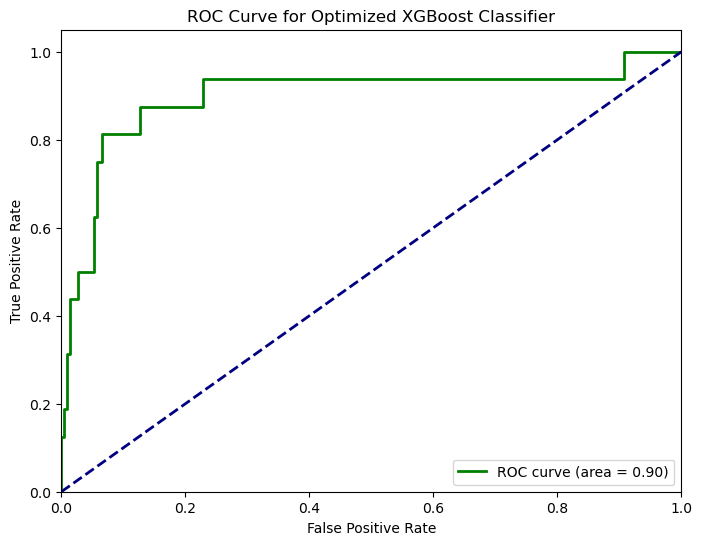

In [358]:
y_scores_best = best_estimator.predict_proba(X_test_cf_f)[:, 1]

fpr, tpr, _ = roc_curve(y_test_cf_f, y_scores_best)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, color='green', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Optimized XGBoost Classifier')
plt.legend(loc="lower right")
plt.show()

As expected, the ZGBoost model has been delivering a string performance of AUC = 0.90, however random forest is still in the lead. 

##### Precision/Recall Curve

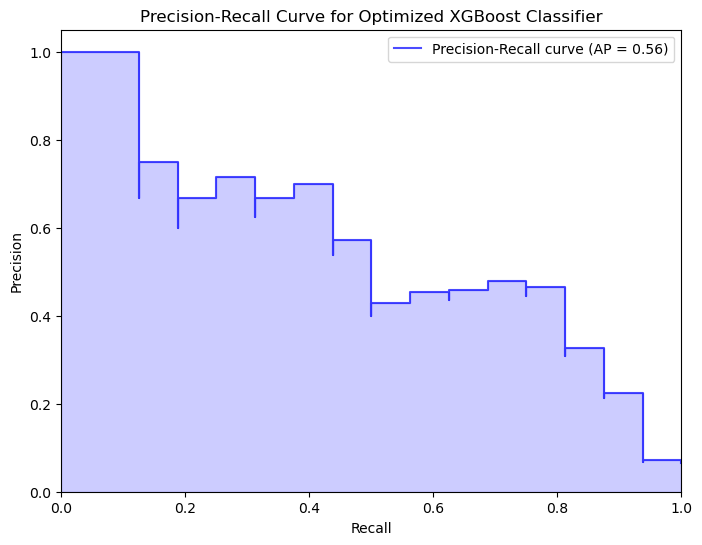

In [359]:
precision, recall, _ = precision_recall_curve(y_test_cf_f, y_scores_best)
average_precision = average_precision_score(y_test_cf_f, y_scores_best)

plt.figure(figsize=(8, 6))
plt.step(recall, precision, where='post', color='blue', alpha=0.7, 
         label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.fill_between(recall, precision, step='post', alpha=0.2, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve for Optimized XGBoost Classifier')
plt.legend(loc="upper right")
plt.show()

-------------

#### Results

In [360]:
model_metrics_class_F = [
    {"Model": "SGD Classifier", "Accuracy": accuracy_score(y_test_cf_f, y_pred_sgdF), "Precision": precision_score(y_test_cf_f, y_pred_sgdF), "Recall": recall_score(y_test_cf_f, y_pred_sgdF), "F1 Score": f1_score(y_test_cf_f, y_pred_sgdF)},
    {"Model": "Random Forest", "Accuracy": accuracy_score(y_test_cf_f, y_pred_rfF), "Precision": precision_score(y_test_cf_f, y_pred_rfF), "Recall": recall_score(y_test_cf_f, y_pred_rfF), "F1 Score": f1_score(y_test_cf_f, y_pred_rfF)},
     {"Model": "Random Forest GS", "Accuracy": accuracy_score(y_test_cf_f, y_pred_rf_gsF), "Precision": precision_score(y_test_cf_f, y_pred_rf_gsF), "Recall": recall_score(y_test_cf_f, y_pred_rf_gsF), "F1 Score": f1_score(y_test_cf_f, y_pred_rf_gsF)},
    {"Model": "XGBoost GS", "Accuracy": accuracy_score(y_test_cf_f, y_pred_xgbF), "Precision": precision_score(y_test_cf_f, y_pred_xgbF), "Recall": recall_score(y_test_cf_f, y_pred_xgbF), "F1 Score": f1_score(y_test_cf_f, y_pred_xgbF)}
]

classifiers_F = pd.DataFrame(model_metrics_class_F)
print(classifiers_F)

              Model  Accuracy  Precision  Recall  F1 Score
0    SGD Classifier  0.405738   0.083871  0.8125  0.152047
1     Random Forest  0.934426   0.500000  0.7500  0.600000
2  Random Forest GS  0.934426   0.500000  0.6875  0.578947
3        XGBoost GS  0.922131   0.421053  0.5000  0.457143


-----------------------------------------------------------

## VI. aveOralM

### Task 1. Regression</h3>

#### Linear regression and coefficients

In [361]:
model = LinearRegression()
model.fit(X_train_reg_m, y_train_reg_m)
y_pred_lr_m = model.predict(X_test_reg_m)
print("R^2 for linear regression: ", r2_score(y_test_reg_m, y_pred_lr_m))
print("MSE for linear regression: ", mean_squared_error(y_test_reg_m, y_pred_lr_m))
print("RMSE for linear regression: ", mean_squared_error(y_test_reg_m, y_pred_lr_m)**0.5)

coefficients = pd.DataFrame()
coefficients['feature'] = list(X_train_reg_m.columns)
coefficients['coefficient'] =  model.coef_
coefficients.head()

R^2 for linear regression:  -7.098627210114763
MSE for linear regression:  1.6894160111184504
RMSE for linear regression:  1.2997753694844545


,feature,coefficient
0,Age,0.020070
1,T_atm,-0.070130
2,Humidity,0.000460
3,Distance,-0.272497
4,T_offset1,0.092025


According to the above dataframe, the features T_atm and Distance are negatively impacting the dependent variable. However, the Age, Humidity and T_offset1 have a positive relationship with the dependent feature, with the latter being the most impactful, as the coefficient is 0.092025. This is in line with the coefficient represented in the linear regression for the aveOralF target variable, where the T_offset1 is the variable with the highest impact. 

#### Polynomial model 

In [362]:
#applying polynomial regression degree 2
poly_m = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans_m = poly_m.fit_transform(X_train_reg_m)
x_test_trans_m = poly_m.transform(X_test_reg_m)

In [363]:
#fitting a simple linear regression for x_train_trans
model_poly_m = LinearRegression()
model_poly_m.fit(x_train_trans_m, y_train_reg_m)
y_pred_poly_M = model.predict(X_test_reg_m)

In [364]:
print("R^2: ", r2_score(y_test_reg_m, y_pred_poly_M))
print("MSE: ", mean_squared_error(y_test_reg_m, y_pred_poly_M))
print("RMSE: ", mean_squared_error(y_test_reg_m, y_pred_poly_M)**0.5)

R^2:  -7.098627210114763
MSE:  1.6894160111184504
RMSE:  1.2997753694844545


#### Random forest regressor

In [365]:
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train_reg_m, y_train_reg_m)
y_pred_rf_reg_m = forest_reg.predict(X_test_reg_m)

print("R^2 for random forest regressor: ", r2_score(y_test_reg_m, y_pred_rf_reg_m))
print("MSE for random forest regressor: ", mean_squared_error(y_test_reg_m, y_pred_rf_reg_m))
print("RMSE for random forest regressor: ", mean_squared_error(y_test_reg_m, y_pred_rf_reg_m)**0.5)


R^2 for random forest regressor:  0.7280223474913752
MSE for random forest regressor:  0.056735961403509255
RMSE for random forest regressor:  0.23819311787604036


#### Random forest grid search regressor

In [366]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_gs_m = RandomForestRegressor(random_state=42)
grid_search_rf_gs_m = GridSearchCV(forest_gs_m, param_grid, cv=3, n_jobs=-1,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search_rf_gs_m.fit(X_train_reg_m, y_train_reg_m)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [367]:
best_forest = grid_search_rf_gs_m.best_estimator_
tree_to_plot2 = best_forest.estimators_[0]

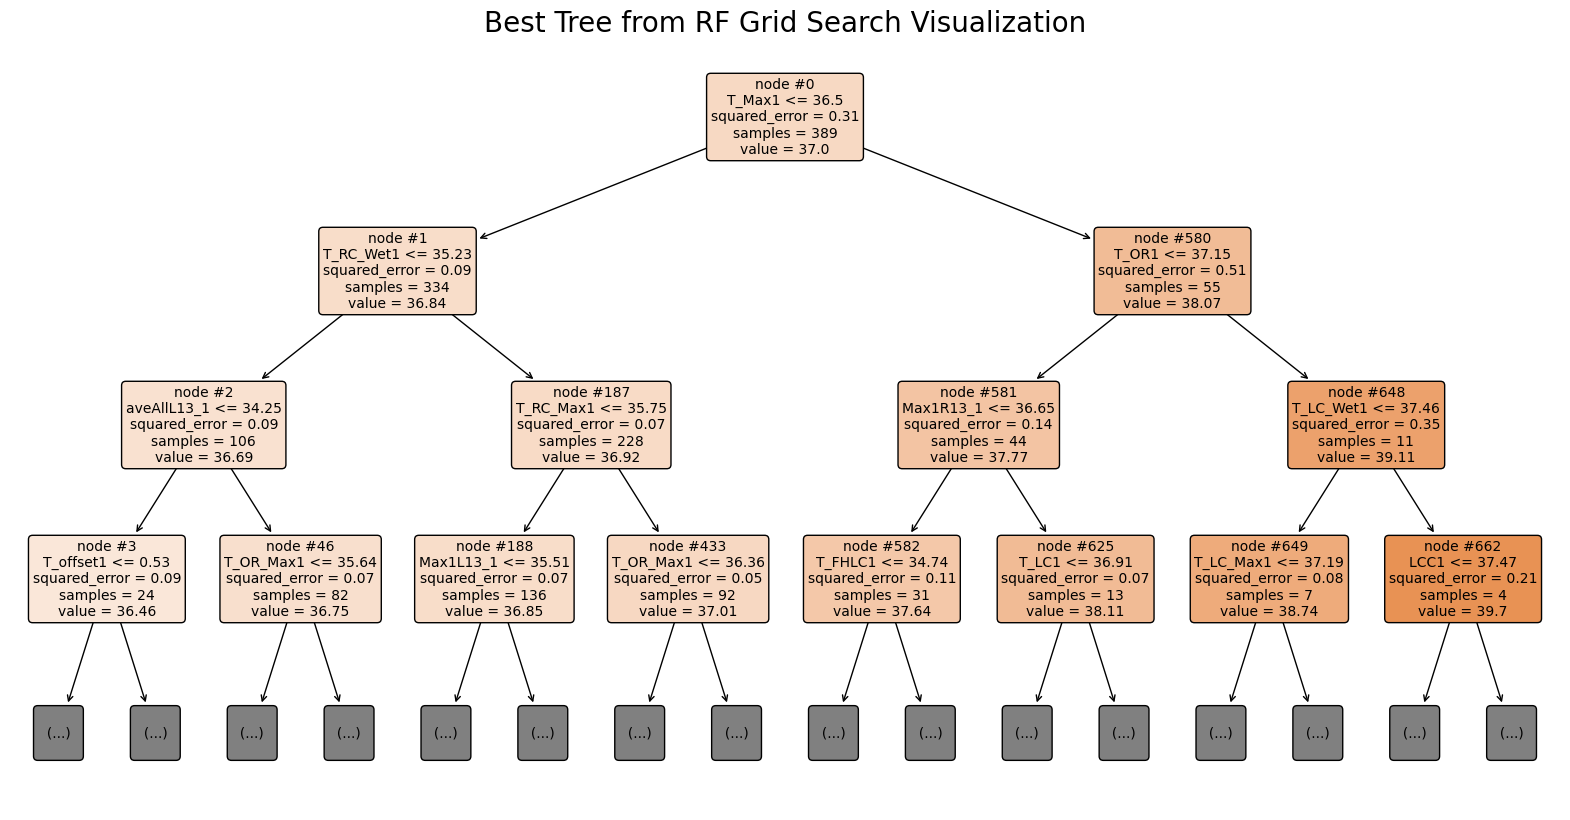

In [368]:
# plotting the best tree extracted from the RF grid search

plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot2, 
          filled=True, 
          feature_names=X_train_reg_f.columns,
          rounded=True, 
          precision=2, 
          max_depth=3,
          proportion=False,
          fontsize=10, 
          node_ids=True, 
          )
plt.title('Best Tree from RF Grid Search Visualization', fontsize=20)
plt.show()

In [369]:
y_pred_rf_gs_m = best_forest.predict(X_test_reg_m)
print("R^2: ", r2_score(y_test_reg_m, y_pred_rf_gs_m))
print("MSE: ", mean_squared_error(y_test_reg_m, y_pred_rf_gs_m))
print("RMSE: ", mean_squared_error(y_test_reg_m, y_pred_rf_gs_m)**0.5)

R^2:  0.7073723222513094
MSE:  0.06104366471734938
RMSE:  0.24707016152775182


In [370]:
#feature_importances_ : they are computed as the mean and standard deviation of accumulation of the impurity decrease within each tree
trees_feature_imp_m = tree_to_plot2.feature_importances_
trees_feature_imp_m

array([4.97295892e-03, 3.68342213e-03, 3.62760446e-03, 7.97884073e-03,
       7.62659539e-03, 2.84403655e-02, 7.35067268e-03, 2.98316895e-03,
       2.06258322e-02, 1.20910097e-02, 9.52153813e-03, 3.55048181e-02,
       1.66077602e-02, 5.36152558e-03, 6.99737129e-03, 3.29129892e-02,
       7.72903356e-03, 8.05639642e-03, 1.01371561e-02, 3.47815379e-03,
       5.31338193e-03, 5.28233351e-03, 8.26518382e-03, 8.67197467e-03,
       3.54653888e-03, 8.51416099e-03, 4.01425955e-03, 1.90120087e-03,
       5.62719426e-01, 1.38369679e-01, 1.54496122e-02, 9.85975569e-06,
       4.56820476e-04, 5.55432904e-04, 0.00000000e+00, 1.16404444e-03,
       7.88780456e-05])

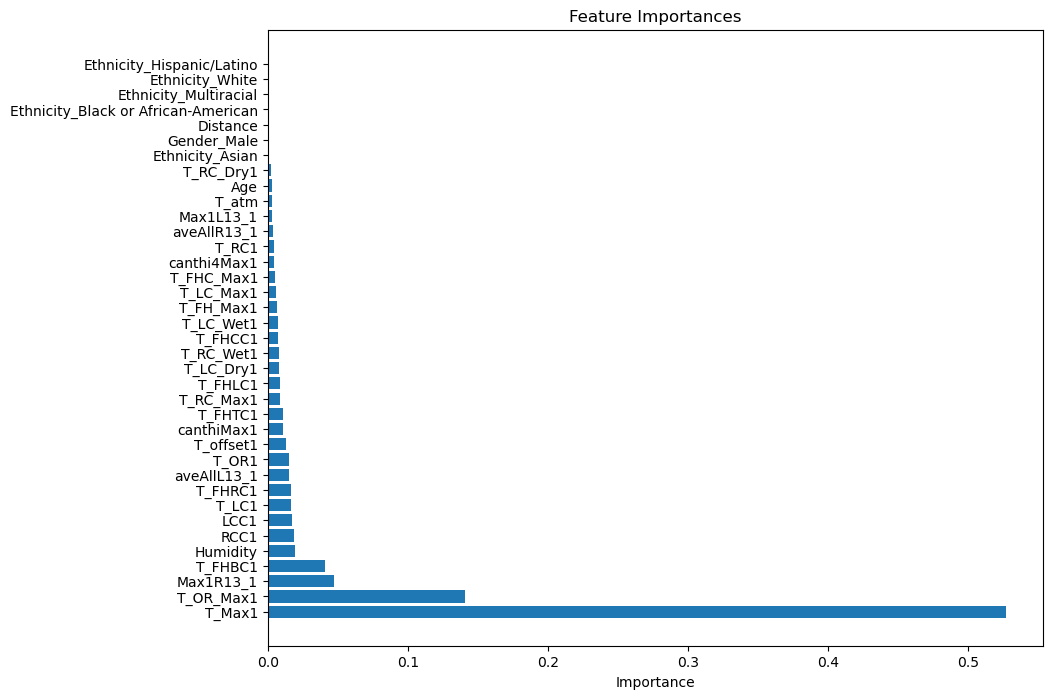

In [371]:
trees_feature_imp_m = tree_to_plot2.feature_importances_

# creating a data frame that maps the feature names to their importance scores
feature_imp_df = pd.DataFrame({
    'Feature': X_train_reg_f.columns,  
    'Importance': trees_feature_imp_f
}).sort_values('Importance', ascending=False)  # sort df by importance

# Plot
plt.figure(figsize=(10, 8))
plt.barh(feature_imp_df['Feature'], feature_imp_df['Importance'])  
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

#### Lasso model for regression

In [372]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_reg_m, y_train_reg_m)
y_pred_lasso_m = lasso_model.predict(X_test_reg_m)

print("R^2 for the Lasso model: ", r2_score(y_test_reg_m, y_pred_lasso_m))
print("MSE for the Lasso model: ", mean_squared_error(y_test_reg_m, y_pred_lasso_m))
print("RMSE for the Lasso model: ", mean_squared_error(y_test_reg_m, y_pred_lasso_m)**0.5)


R^2 for the Lasso model:  0.596373530472416
MSE for the Lasso model:  0.08419859347019516
RMSE for the Lasso model:  0.29016993894991117


#### Ridge model

In [373]:
ridge_model_m = Ridge()
ridge_model_m.fit(X_train_reg_m, y_train_reg_m)
y_pred_ridge_m = ridge_model.predict(X_test_reg_m)

print("R^2: ", r2_score(y_test_reg_m, y_pred_ridge_m))
print("MSE: ", mean_squared_error(y_test_reg_m, y_pred_ridge_m))
print("RMSE: ", mean_squared_error(y_test_reg_m, y_pred_ridge_m)**0.5)

R^2:  -2.9155837640363202
MSE:  0.8168112609969941
RMSE:  0.90377611220755


---------------------

#### Results

In [374]:
#identifying the best model for the regression of aveOralM

model_metrics_reg_M = [
    {"Model": "Linear Regression", "R^2: ": r2_score(y_test_reg_m, y_pred_lr_m), "MSE: ": mean_squared_error(y_test_reg_m, y_pred_lr_m), "RMSE: ": mean_squared_error(y_test_reg_m, y_pred_lr_m)**0.5},
     {"Model": "Polynomial model", "R^2: " : r2_score(y_test_reg_m, y_pred_poly_M), "MSE: ": mean_squared_error(y_test_reg_m, y_pred_poly_M), "RMSE: ": mean_squared_error(y_test_reg_m, y_pred_poly_M)**0.5},
    {"Model": "Random Forest", "R^2: " : r2_score(y_test_reg_m, y_pred_rf_reg_m), "MSE: ": mean_squared_error(y_test_reg_m, y_pred_rf_reg_m), "RMSE: ": mean_squared_error(y_test_reg_m, y_pred_rf_reg_m)**0.5},
     {"Model": "Random Forest GS", "R^2: ": r2_score(y_test_reg_m, y_pred_rf_gs_m), "MSE: ": mean_squared_error(y_test_reg_m, y_pred_rf_gs_m), "RMSE: ": mean_squared_error(y_test_reg_m, y_pred_rf_gs_m)**0.5},
    {"Model": "Lasso", "R^2: " :r2_score(y_test_reg_m, y_pred_lasso_m), "MSE: ": mean_squared_error(y_test_reg_m, y_pred_lasso_m), "RMSE: ": mean_squared_error(y_test_reg_m, y_pred_lasso_m)**0.5},
    {"Model": "Ridge", "R^2: " :r2_score(y_test_reg_m, y_pred_ridge_m), "MSE: ": mean_squared_error(y_test_reg_m, y_pred_ridge_m), "RMSE: ": mean_squared_error(y_test_reg_m, y_pred_ridge_m)**0.5}
]

regs_M = pd.DataFrame(model_metrics_reg_M)
print(regs_M)

               Model     R^2:      MSE:     RMSE: 
0  Linear Regression -7.098627  1.689416  1.299775
1   Polynomial model -7.098627  1.689416  1.299775
2      Random Forest  0.728022  0.056736  0.238193
3   Random Forest GS  0.707372  0.061044  0.247070
4              Lasso  0.596374  0.084199  0.290170
5              Ridge -2.915584  0.816811  0.903776


----------------------------

### Task 2. Classification</h3>

In [375]:
print("Positive class proportion ", np.round(df['aveOralM_has_fever'].sum() / len(df) * 100 , 2), "%")

Positive class proportion  10.9 %


The data is very imbalanced, with the positive class being very small, therefore the SMOTE technique will be applied to the data set. 

In [376]:
smote = SMOTE(random_state=42)
X_train_cf_m, y_train_cf_m = smote.fit_resample(X_train_cf_m, y_train_cf_m)

#### SGD Classifier

In [377]:
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train_cf_m, y_train_cf_m)

cross_val_score(sgd_clf, X_train_cf_m, y_train_cf_m, cv=3, n_jobs=-1, scoring="accuracy")

y_pred_sgdM = sgd_clf.predict(X_test_cf_m)

In [378]:
confusion_matrix(y_test_cf_m, y_pred_sgdM)

array([[  7, 211],
       [  0,  26]], dtype=int64)

In [379]:
print("Accuracy: ", accuracy_score(y_test_cf_f, y_pred_sgdM))
print("Precision: ", precision_score(y_test_cf_f, y_pred_sgdM))
print("Recall: ", recall_score(y_test_cf_f, y_pred_sgdM))
print("F1 Score: ", f1_score(y_test_cf_f, y_pred_sgdM))

Accuracy:  0.0942622950819672
Precision:  0.06751054852320675
Recall:  1.0
F1 Score:  0.12648221343873517


##### ROC Curve

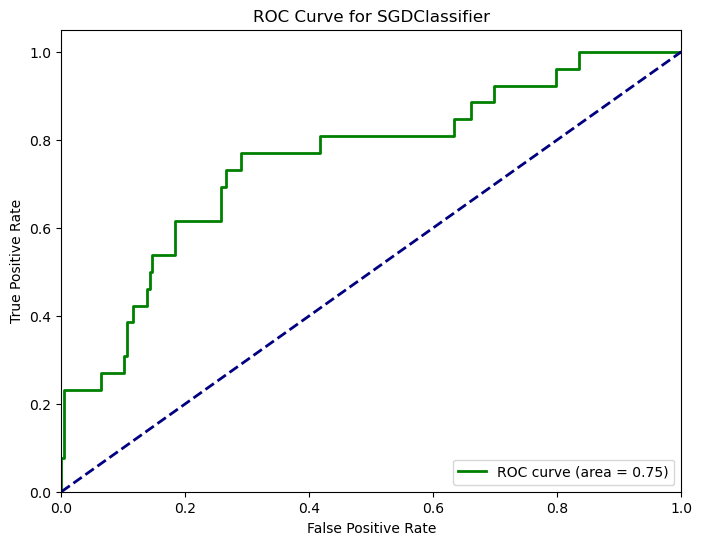

In [380]:
y_scores_sgd = sgd_clf.decision_function(X_test_cf_m)

fpr, tpr, _ = roc_curve(y_test_cf_m, y_scores_sgd)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, color='green', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SGDClassifier')
plt.legend(loc="lower right")
plt.show()

precision, recall, _ = precision_recall_curve(y_test_cf_m, y_scores_sgd)
average_precision = average_precision_score(y_test_cf_m, y_scores_sgd)

The SGD model done on aveOralM seems to perform slightly better than before where the AUC was 0.70, however it still leaves 25% area of improvement. 

##### Precision/recall plot

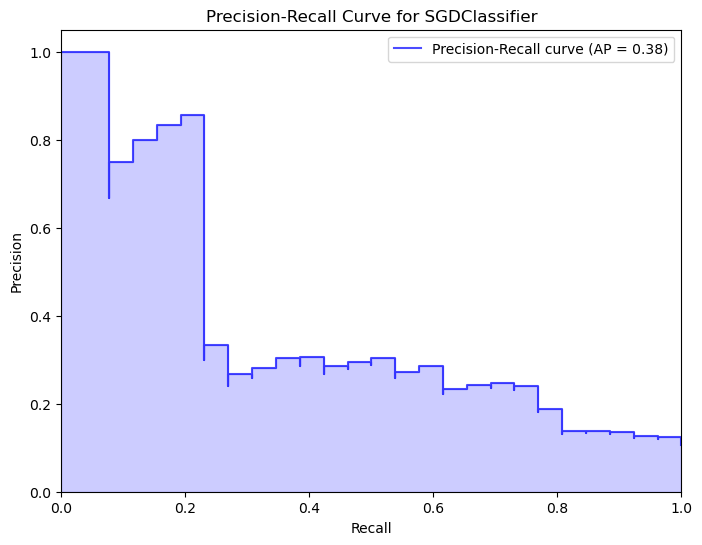

In [381]:
plt.figure(figsize=(8, 6))
plt.step(recall, precision, where='post', color='blue', alpha=0.7, 
         label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.fill_between(recall, precision, step='post', alpha=0.2, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve for SGDClassifier')
plt.legend(loc="upper right")
plt.show()


#### Random Forest classifier and grid search

In [382]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_cf_m, y_train_cf_m)
y_pred_rfM = rf_classifier.predict(X_test_cf_m)

In [383]:
print("Accuracy on the unseen data: ", accuracy_score(y_test_cf_m, y_pred_rfM))
print("Precision on the unseen data: ", precision_score(y_test_cf_m, y_pred_rfM))
print("Recall on the unseen data: ", recall_score(y_test_cf_m, y_pred_rfM))
print("F1 Score on the unseen data: ", f1_score(y_test_cf_m, y_pred_rfM))

Accuracy on the unseen data:  0.9467213114754098
Precision on the unseen data:  0.696969696969697
Recall on the unseen data:  0.8846153846153846
F1 Score on the unseen data:  0.7796610169491526


In [384]:
param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'bootstrap': [True, False] 
}


rf_classifier = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train_cf_m, y_train_cf_m)
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_estimator = grid_search.best_estimator_
y_pred_rf_gsM = best_estimator.predict(X_test_cf_m) #this gets the final results of the best model

accuracy = accuracy_score(y_test_cf_m, y_pred_rf_gsM)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.9732930283684944


In [385]:
y_pred_train = best_estimator.predict(X_train_cf_m)
print("Accuracy for the unseen data: ", accuracy_score(y_train_cf_m, y_pred_train))

Accuracy for the unseen data:  1.0


In [386]:
print("Accuracy on the test data: ", accuracy)

Accuracy on the test data:  0.9467213114754098


##### ROC Curve

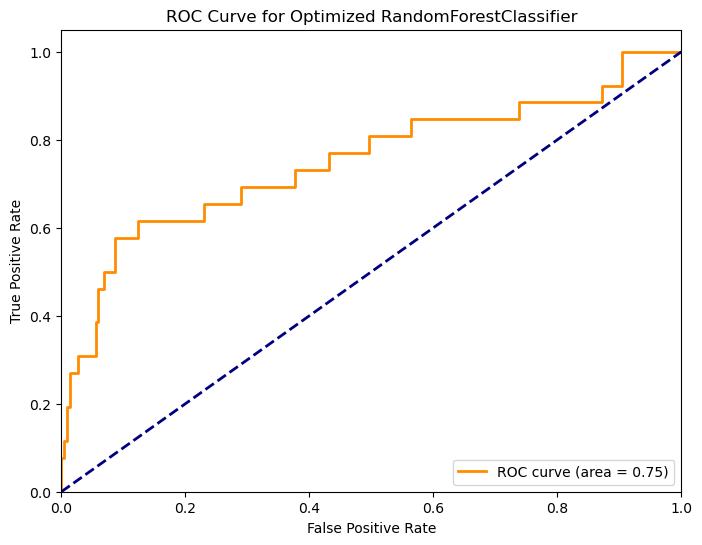

In [387]:
fpr, tpr, _ = roc_curve(y_test_cf_m, y_scores_best)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Optimized RandomForestClassifier')
plt.legend(loc="lower right")
plt.show()

In this instance, the random forest seems to perform lower than before, leaving room for improvement. 

##### Precision/recall plot

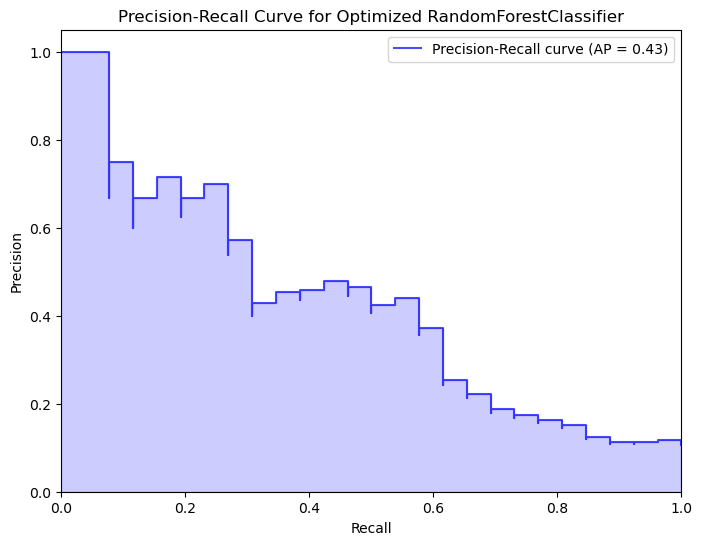

In [388]:
precision, recall, _ = precision_recall_curve(y_test_cf_m, y_scores_best)
average_precision = average_precision_score(y_test_cf_m, y_scores_best)

plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='blue', where='post', alpha=0.7, 
         label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.fill_between(recall, precision, alpha=0.2, color='blue', step='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve for Optimized RandomForestClassifier')
plt.legend(loc="upper right")
plt.show()


#### XGBoost grid search classifier

In [389]:
param_grid = {
    'n_estimators': [100, 200],  
    'learning_rate': [0.01, 0.1],  
    'max_depth': [4, 6, 8], 
    'min_child_weight': [1, 5],  
    'subsample': [0.8, 1.0],  
    'colsample_bytree': [0.8, 1.0],  
}

xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

grid_search.fit(X_train_cf_m, y_train_cf_m)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_estimator = grid_search.best_estimator_
y_pred_xgb_gsM = best_estimator.predict(X_test_cf_m)

accuracy = accuracy_score(y_test_cf_m, y_pred_xgb_gsM)
print(f"Accuracy of the best model: {accuracy*100:.2f}%")

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}
Best Score: 0.9760580053270198
Accuracy of the best model: 95.08%


In [390]:
y_pred_train = best_estimator.predict(X_train_cf_m)
accuracy_train = accuracy_score(y_train_cf_m, y_pred_train)

print(f"Accuracy of the best model on the trains set: {accuracy_train*100:.2f}%")

Accuracy of the best model on the trains set: 100.00%


In [391]:
print("Accuracy on the unseen data: ", accuracy_score(y_test_cf_m, y_pred_xgb_gsM))
print("Precision on the unseen data: ", precision_score(y_test_cf_m, y_pred_xgb_gsM))
print("Recall on the unseen data: ", recall_score(y_test_cf_m, y_pred_xgb_gsM))
print("F1 Score on the unseen data: ", f1_score(y_test_cf_m, y_pred_xgb_gsM))

Accuracy on the unseen data:  0.9508196721311475
Precision on the unseen data:  0.71875
Recall on the unseen data:  0.8846153846153846
F1 Score on the unseen data:  0.7931034482758621


##### ROC Curve

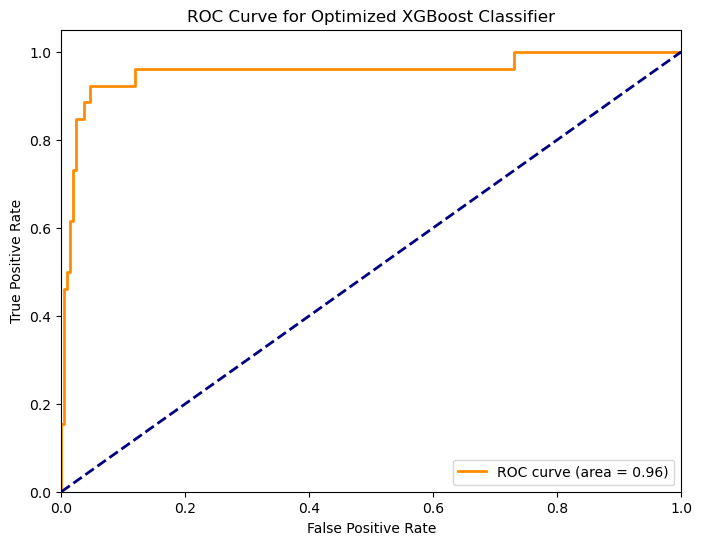

In [392]:
y_scores_best = best_estimator.predict_proba(X_test_cf_m)[:, 1]

fpr, tpr, _ = roc_curve(y_test_cf_m, y_scores_best)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Optimized XGBoost Classifier')
plt.legend(loc="lower right")
plt.show()

In the classification for aveOralM, the winner is the XGBoost with an AUC of 0.96, meaning the False Positive rate is very low. 

##### Precision/Recall plot

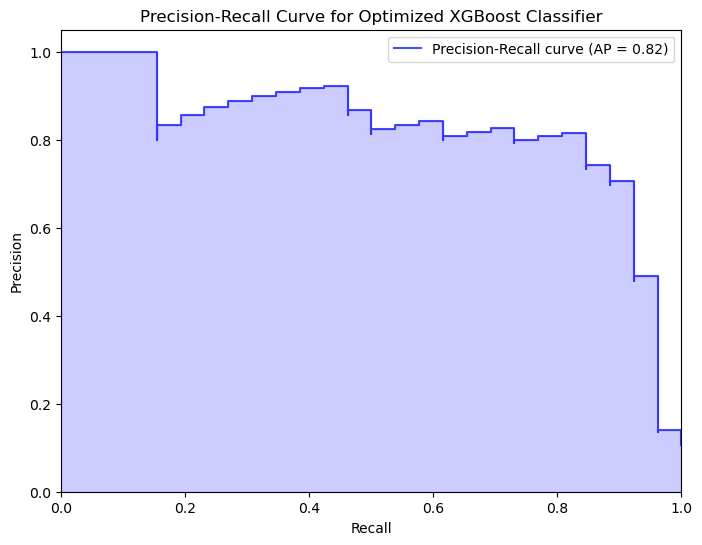

ROC AUC Score:  0.9560691601976007
Average Precision Score:  0.8239880159861817


In [393]:
precision, recall, _ = precision_recall_curve(y_test_cf_m, y_scores_best)
average_precision = average_precision_score(y_test_cf_m, y_scores_best)

plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='blue', where='post', alpha=0.7,
         label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.fill_between(recall, precision, step='post', alpha=0.2, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve for Optimized XGBoost Classifier')
plt.legend(loc="upper right")
plt.show()

print("ROC AUC Score: ", roc_auc_score(y_test_cf_m, y_scores_best))
print("Average Precision Score: ", average_precision)

-----------

#### Results

In [394]:
model_metrics_class_M = [
    {"Model": "SGD Classifier", "Accuracy": accuracy_score(y_test_cf_f, y_pred_sgdM), "Precision": precision_score(y_test_cf_f, y_pred_sgdM), "Recall": recall_score(y_test_cf_f, y_pred_sgdM), "F1 Score": f1_score(y_test_cf_f, y_pred_sgdM)},
    {"Model": "Random Forest", "Accuracy": accuracy_score(y_test_cf_f, y_pred_rfM), "Precision": precision_score(y_test_cf_f, y_pred_rfM), "Recall": recall_score(y_test_cf_f, y_pred_rfM), "F1 Score": f1_score(y_test_cf_f, y_pred_rfM)},
     {"Model": "Random Forest GS", "Accuracy": accuracy_score(y_test_cf_f, y_pred_rf_gsM), "Precision": precision_score(y_test_cf_f, y_pred_rf_gsM), "Recall": recall_score(y_test_cf_f, y_pred_rf_gsM), "F1 Score": f1_score(y_test_cf_f, y_pred_rf_gsM)},
    {"Model": "XGBoost GS", "Accuracy": accuracy_score(y_test_cf_f, y_pred_xgb_gsM), "Precision": precision_score(y_test_cf_f, y_pred_xgb_gsM), "Recall": recall_score(y_test_cf_f, y_pred_xgb_gsM), "F1 Score": f1_score(y_test_cf_f, y_pred_xgb_gsM)}
]

classifiers_M = pd.DataFrame(model_metrics_class_M)
print(classifiers_M)

              Model  Accuracy  Precision  Recall  F1 Score
0    SGD Classifier  0.094262   0.067511  1.0000  0.126482
1     Random Forest  0.905738   0.393939  0.8125  0.530612
2  Random Forest GS  0.905738   0.393939  0.8125  0.530612
3        XGBoost GS  0.909836   0.406250  0.8125  0.541667


------------------------
## VII. Analysis & Results

#### Regression Analysis

In [395]:
print(regs_f)

               Model      R^2:      MSE:     RMSE: 
0  Linear Regression -10.128587  1.528386  1.236279
1   Polynomial Model -10.128587  1.528386  1.236279
2      Random Forest   0.523273  0.065473  0.255877
3   Random Forest GS   0.534378  0.063948  0.252879
4              Lasso   0.324534  0.092768  0.304578
5              Ridge  -4.880255  0.807587  0.898658


A basic overview would say that the best model for predicting aveOralF is the random forest model using the grid search technique, as it has a high R squared and a low MSE. The high R squared shows it captured more variance in the data and the low MSE shows the smallest average squared difference between the actual and predicted values, indicating high accuracy in predictions.

In [396]:
print(regs_M)

               Model     R^2:      MSE:     RMSE: 
0  Linear Regression -7.098627  1.689416  1.299775
1   Polynomial model -7.098627  1.689416  1.299775
2      Random Forest  0.728022  0.056736  0.238193
3   Random Forest GS  0.707372  0.061044  0.247070
4              Lasso  0.596374  0.084199  0.290170
5              Ridge -2.915584  0.816811  0.903776


Compared to the other target variable, the models trained on aveOralM show a slightly different result. In this case, the baseline random forest model has the highest R squared and a low MSE. In this case it is highlighted that the random forest model can understand the variance in data whilst minimising errors. The comparison between models done on two different target variables shows that the model results and interpretations are context driven, and therefore, in the industry it will be best to look at target variables and models from all angles, trying multiple methods. 

It also illustrates that the hyperparameters that are used for the baseline model are simply better for the kind of data that was used for aveOralM than the multiple hyperparameters used for the random forest with the GS technique. 

The next part of this report will look to train the best regressor on unseen data and plot the predictions versus the actual data, for visualisation purposes. 

#### Best regressor 

In [397]:
#testing the best regressor on the validation test 
best_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
best_regressor.fit(X_train_reg_m, y_train_reg_m)


RandomForestRegressor(random_state=42)

In [398]:
y_pred_best_regressor = forest_reg.predict(X_validation_reg_m)

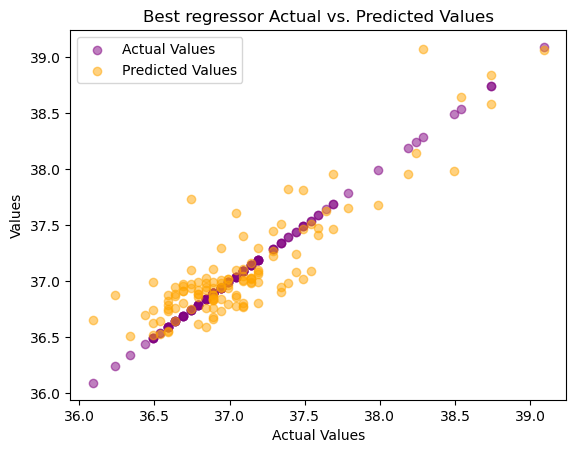

In [399]:
#plotting the predictions on top of the actual data

plt.scatter(y_validation_reg_m, y_validation_reg_m, color='purple', alpha=0.5, label='Actual Values')
plt.scatter(y_validation_reg_m, y_pred_best_regressor, color='orange', alpha=0.5, label='Predicted Values')

plt.xlabel('Actual Values')
plt.ylabel('Values')
plt.title('Best regressor Actual vs. Predicted Values')
plt.legend()
plt.show()


The plot above illustrates the best regressor's predictions versus the actual data. The actual values are represented in pink and the predictions in orange. 

In order to interpret the plot, one must remember that the closer the predictions are to the line of the actual values, the better the model predictions. In this case, there seems to be a clear pozitive linear relationship, which shows that the model's predictions are quite close to the actual data. 

There seems to be a cluster of predictions between 36.0 degrees and 37.5 degrees, which is our fever threshold. This means that the model is correctly predicting well enough in between those two temperatures. However there seems to be relatively little points moving forward from 37.5 degrees. This can show that the model is struggling to identify temperatures higher than that, but it can also show there are simply not a lot of temperatures much higher than 38.0 degrees. 

Finally, the model has done a well enough job at predicting the temperatures, with a lot of the orange dots sticking close by to the actual data, showing that the model can be used to predict temperatures. 



--------------------

#### Classification Analysis

In [400]:
print(classifiers_F)

              Model  Accuracy  Precision  Recall  F1 Score
0    SGD Classifier  0.405738   0.083871  0.8125  0.152047
1     Random Forest  0.934426   0.500000  0.7500  0.600000
2  Random Forest GS  0.934426   0.500000  0.6875  0.578947
3        XGBoost GS  0.922131   0.421053  0.5000  0.457143


In [401]:
print(classifiers_M)

              Model  Accuracy  Precision  Recall  F1 Score
0    SGD Classifier  0.094262   0.067511  1.0000  0.126482
1     Random Forest  0.905738   0.393939  0.8125  0.530612
2  Random Forest GS  0.905738   0.393939  0.8125  0.530612
3        XGBoost GS  0.909836   0.406250  0.8125  0.541667


The best classifier for aveOralF was the Random forest and the best model for aveOralM was the random forest using the grid search technique, therefore I will be using the latter as the best model for the following part of the report. 

In terms of accuracy, the random forest GS has achieved an accuracy of 90%, a precision of 39%, recall of 81% and a F1 score of 53%. The accuracy performance measure suggests that model correctly predicts the outcome about 90.57% of the time across the dataset, howver it is not enough to decide this is a good model. 

The precision performance measure suggests that when the model predicts the positive class, it is correct approximately 39.39% of the time. This is significantly higher than the precision of the SGD Classifier for example (only 6%), however it is still a considerable number of false positives, therefore allowing room for improvement. 

The recall performance measure illustrates that the model labels "pozitive" 81% of the true pozitives, which is a good metric. It means the model is quite sensitive to the binary classes and can easily detect the difference between pozitive and negative. 

Finally, the F1 score is relatively moderate with just 53%. The same as the precision metric, leaves room for improvement. 

The next part of this report will look at using the best model with unseen data and looking at its performance metrics.

--------

#### Best classifier

In [402]:
#running the model again 

# performing the RF grid search classifier

param_grid_rf_gs_best = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'bootstrap': [True, False] 
}


rf_gs_best_model = RandomForestClassifier(random_state=42)

grid_search_best_model = GridSearchCV(estimator=rf_gs_best_model, param_grid=param_grid_rf_gs_best, cv=5, verbose=2, n_jobs=-1)
grid_search_best_model.fit(X_train_cf_f, y_train_cf_f)
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_estimator = grid_search.best_estimator_
y_pred_rf_gsF = best_estimator.predict(X_test_cf_f) #this gets the final results of the best model

#accuracy = accuracy_score(y_test_cf_f, y_pred_rf_gsF)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}
Best Score: 0.9760580053270198


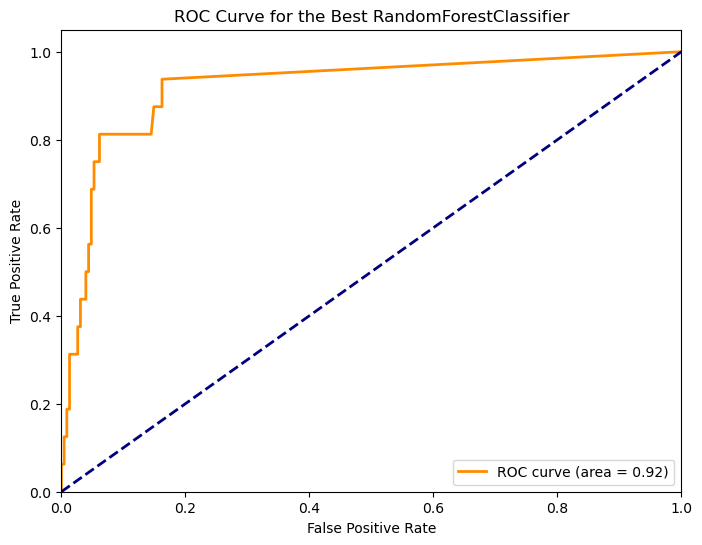

AUC Score:  0.9668311403508772


In [403]:
y_scores_best_model = best_estimator.predict_proba(X_test_cf_f)[:, 1]

fpr_best_model, tpr_best_model, _ = roc_curve(y_test_cf_f, y_scores_best_model)
roc_auc_best_model = auc(fpr_best_model, tpr_best_model)

plt.figure(figsize=(8, 6))
plt.plot(fpr_best, tpr_best, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_best)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for the Best RandomForestClassifier')
plt.legend(loc="lower right")
plt.show()

print("AUC Score: ", roc_auc_score(y_test_cf_f, y_scores_best_model))

In [404]:
# validation set try out

y_pred_rf_gsF_validation = best_estimator.predict(X_validation_cf_f) #this gets the final results of the best model

In [405]:
print("Accuracy on the unseen data: ", accuracy_score(y_validation_cf_f, y_pred_rf_gsF_validation))
print("Precision on the unseen data: ", precision_score(y_validation_cf_f, y_pred_rf_gsF_validation))
print("Recall on the unseen data: ", recall_score(y_validation_cf_f, y_pred_rf_gsF_validation))
print("F1 Score on the unseen data: ", f1_score(y_validation_cf_f, y_pred_rf_gsF_validation))

Accuracy on the unseen data:  0.9329268292682927
Precision on the unseen data:  0.47619047619047616
Recall on the unseen data:  1.0
F1 Score on the unseen data:  0.6451612903225806


Overall, the classifier used on unseen data has fairly good measures, showing an accuracy of 93%, precision of 47%, recall of 1 and a F1 score of 64%. 

As before, the model could be improved in terms of precision. 

The recall metric illustrates that the model can see all the actual positives. However, looking at the small precision it might be that the model is slightly biased towards predicting the positive class. However, in a medical environment where the goal is to classify who is sick and who is not, an overprediction of the positive class might not be the worst thing, even at the expense of making some false positives. 

The F1 score shows a moderate 64%, that leaves room for improvement in terms of the balance between prediction and recall. 

Overall, the model can be used in classifying medical diagnostics, even if it might mean that it will output a few false positives. 

The next part of this report will look at updating the decision threshold of the best classifier. 

------------

#### Updating decision treshold for best model 

As this is a report concerned with a massive division between data (only 6% positive), it is necessary to understand how updating the decision threshold of the model can benefit medical diagnostics. 

According to (Brownlee, 2021), the default decision threshold for most classifiers is 0.5. Updating it can be achieved using Youden's J statistic. 

The statistic is calculated as:

J = Sensitivity + Specificity – 1
Given that we have Sensitivity (TPR) and the complement of the specificity (FPR), we can calculate it as:

J = Sensitivity + (1 – FalsePositiveRate) – 1
Which we can restate as:

J = TruePositiveRate – FalsePositiveRate



In [406]:
def find_best_threshold(model):
    yhat = model.predict_proba(X_validation_cf_f)
    yhat = yhat[:, 1]
    fpr, tpr, thresholds = roc_curve(y_validation_cf_f, yhat)
    # get the best threshold - Youden stat
    J = tpr - fpr
    ix = np.argmax(J)
    best_threshold = thresholds[ix]
    print(f"The Best Thresold is: {best_threshold}")
    return(best_threshold)

In [407]:
best_thresh = find_best_threshold(grid_search_best_model)
best_thresh

The Best Thresold is: 0.5583333333333332


0.5583333333333332

Using Youden's J statistic actually showed that for this report's best classifier that best threshold is in fact 0.5, which means the default threshold was in fact correct. Below there are the confusion matrices plotted for the predictions and the original threshold. 

In [408]:
# using predict for predictions

def find_conf_best_threshold(model, best_thresh):
    yhat = model.predict_proba(X_validation_cf_f)
    yhat = yhat[:, 1]
    preds = (yhat >= best_thresh).astype(int)
    confmat = confusion_matrix(y_validation_cf_f, preds)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = confmat, display_labels = [0, 1])
    cm_display.plot()
    plt.show()

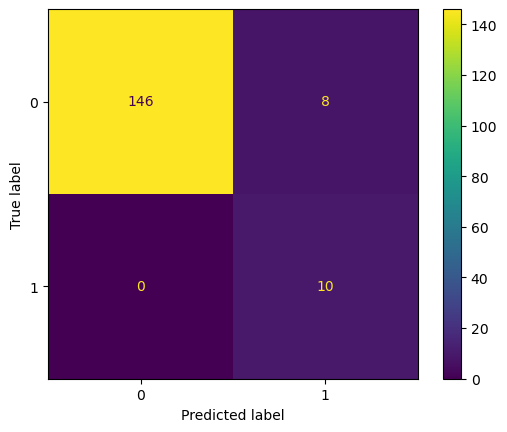

In [409]:
find_conf_best_threshold(grid_search_best_model, best_thresh)

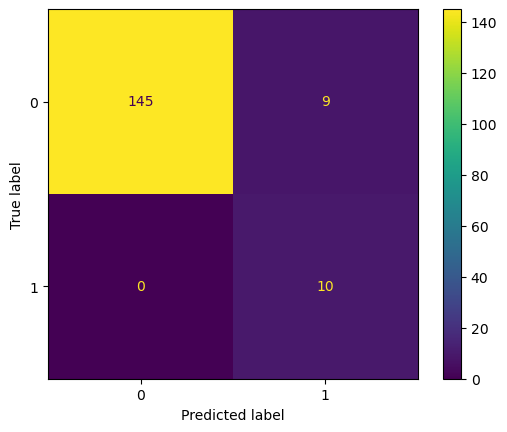

In [410]:
# doing the same confusion matrix but with the original baseline decision threshold 
find_conf_best_threshold(grid_search_best_model, 0.5)

As expected, there is not much of a difference between the two confusion matrices, therefore the baseline decision threshold was in fact correct. However, it was good experiment in order for us to see the impact of the threshold on the model and predictions. 

-------------

#### Feature importance

As mentioned in the methodology, there are two different ways to choose the feature importance used in this report. Firstly, the linear regression coefficients showed that the T_offset1 is one of the features with the highest impact on the dependent variable aveOralF. The linear regression coefficients for aveOralM showed the same results. Having read more about this feature in the report (Wang et al., 2021), it seems that T_offset1 is the temperature difference between the set and measured blackbody temperature. During their research, the authors have identified facial key poiints, different regions/points on the thermal images and defined the temperature at these regions. Because they exhibit different degrees of instability, all IRT measured temperatures were "compensated with a blackbody (ETRS) in the system". 

Secondly, both random forest models have identified T_Max1 as the feature with the highest impact. According to the research conducted above, it seems that the T_Max1 variable is the maximum temperature within the whole face region. Therefore, given the fact that this report is concerned with predicting and classifying both temperatures taken orally and from the forehead, it seems fit that the T_Max1 and T_offset1 are two of the most important variables with the highest impact on both target variables.  

Finally, the feature.importance_ attribute showed that both random forest regressors have found T_Max1 to be by far the most important variable. 

--------------

#### Conclusion

In conclusion, this report looked at the prediction and classification of the oral and forehead temperature from patients in order to provide a medical diagnostic based on a 37.5 degree threshold. 

This report had several limitations from the start, including imbalanced data with only 6% positive class and a significantly small dataset of roughly 1000 rows. However, this report achieved both regression and classification despite of the above mentioned limitations. Random forest was chosen as the best model for both tasks based on multiple performance metrics, such as the ROC curve, precision/recall plots, accuracy, precision, recall, and the F1 score. 

In order to be able to provide a more comprehensive analysis in the future, there are some recommendations. Firstly, it is important to stress the need for a good amount of high quality data. This requires a good amount of time spent on acquiring the data. Secondly, due to the lack of data, this report encourages the use of more sophisticated neural networks that could use much bigger data than this. Thirdly in a domain vast such as healthcare, it is necessary for model engineers to collaborate with medical professionals in getting the correct understanding of variables and feature targets. A lack of such collaboration could perhaps lead to disastruous results otherwise. 

Finally, this report was a good experiment that helped the understanding of working with medical data and the highlighted the importance of machine learning in medical diagnostics. 


## VIII. References

Géron, A. (2023) Hands-on machine learning with scikit-learn, Keras, and tensorflow: Concepts, tools, and techniques to build Intelligent Systems Vol 1. Beijing: O’Reilly. 

Brownlee, J. (2021c) Smote for imbalanced classification with python, MachineLearningMastery.com. Available at: https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/ (Accessed: 24 March 2024). 

Scikit-learn (2024) Feature importances with a forest of trees, scikit. Available at: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html (Accessed: 24 March 2024). 

Mali, K. (2024) Everything you need to know about linear regression!, Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2021/10/everything-you-need-to-know-about-linear-regression/ (Accessed: 24 March 2024). 

Jain, S. (2024) An overview of regularization in deep learning (with python code), Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2018/04/fundamentals-deep-learning-regularization-techniques/) (Accessed: 24 March 2024). 

Frost, J. (2023) Mean squared error (MSE), Statistics By Jim. Available at: https://statisticsbyjim.com/regression/mean-squared-error-mse/ (Accessed: 24 March 2024). 

Agrawal, R. (2023) Know the best evaluation metrics for your regression model !, Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2021/05/know-the-best-evaluation-metrics-for-your-regression-model/ (Accessed: 24 March 2024). 

Brownlee, J. (2021b) A gentle introduction to XGBoost for applied machine learning, MachineLearningMastery.com. Available at: https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/ (Accessed: 24 March 2024).

Brownlee, J. (2021a) A gentle introduction to threshold-moving for Imbalanced Classification, MachineLearningMastery.com. Available at: https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/ (Accessed: 24 March 2024). 

Wang, Q. et al. (2021) Infrared thermography for measuring elevated body temperature: Clinical accuracy, calibration, and evaluation, MDPI. Available at: https://www.mdpi.com/1424-8220/22/1/215 (Accessed: 24 March 2024). 

Infrared thermography temperature (no date) UCI Machine Learning Repository. Available at: https://archive.ics.uci.edu/dataset/925/infrared+thermography+temperature+dataset (Accessed: 24 March 2024). 